![pandas](airbnb_logo.png)

DATASET : AIRBNB BANGKOK

NOVALDI HALOMOAN


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as stats
import warnings
import folium 
warnings.filterwarnings("ignore")


### LATAR BELAKANG:

Kumpulan data ini berisi beragam informasi terkait Airbnb di kota Bangkok. Airbnb, sebagai platform yang memungkinkan individu untuk menyewakan properti atau kamar kepada terutama kepada para petualang atau wisatawan baik lokal maupun internasional, platform ini memberikan akses kepada pengguna untuk menemukan akomodasi unik di seluruh dunia.

Bangkok, Thailand adalah salah satu kota tujuan utama pariwisata dunia. Dilansir dari Mastercard's Global Destination Cities Index, Bangkok adalah tujuan utama pariwisata mancanegara di tahun 2016 hingga 2019. Meskipun terjadi penurunan jumlah kunjungan selama masa pandemi, namun sejak tahun 2022 hingga 2023, jumlah wisatawan kembali meningkat dengan signifikan. Data dari Quartal 1 2023, jumlah turis lokal dan mancanegara Bangkok sejumlah 18.806.133 (ministry of tourism and sport thailand). Jumlah ini mengalahkan jumlah turis lokal maupun internasional di quartal yang sama untuk Paris, sejumlah 11.6 juta(tourism-review) dan turis lokal dan mancanegara Dubai yang berkisar 6.02 juta.(emiratesdnbresearch) 


In [2]:
data_compare_tourism = {
    'name': ['Bangkok', 'Paris', 'Dubai'],
    'visitors': [18.8, 11.6, 6.02],
    'local_tourists': [10.2, None, None],  
    'foreign_tourists': [8.6, None, None]}


tourism = pd.DataFrame(data_compare_tourism)
tourism = tourism.sort_values(by='visitors', ascending=False)

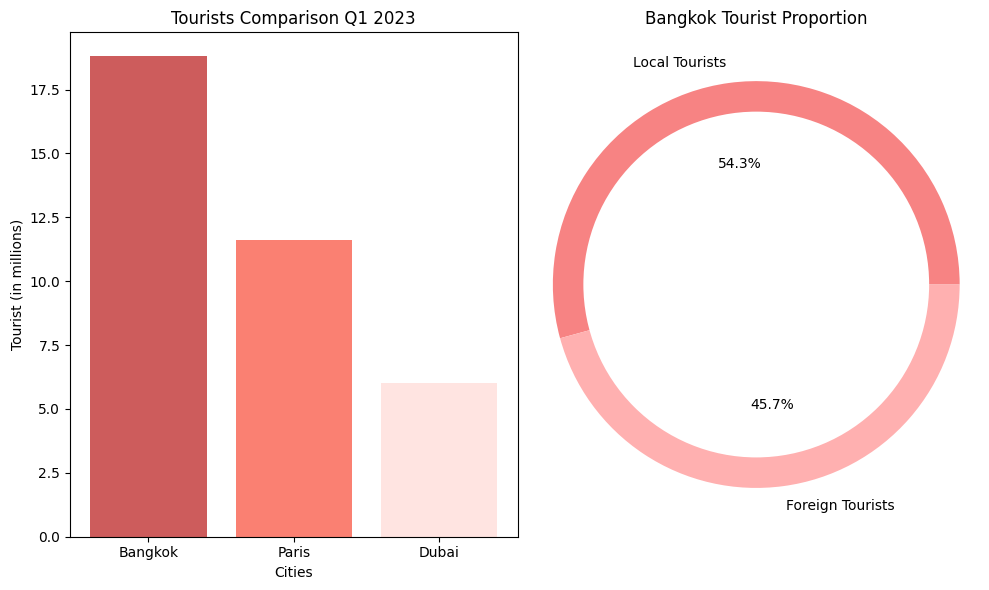

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
axes[0].bar(tourism['name'], tourism['visitors'], color=['indianred', 'salmon', 'mistyrose'])
axes[0].set_xlabel('Cities')
axes[0].set_ylabel('Tourist (in millions)')
axes[0].set_title('Tourists Comparison Q1 2023')

bangkok_tourist = tourism[tourism['name'] == 'Bangkok']
angkok_data = tourism[tourism['name'] == 'Bangkok']
local_foreign_data = bangkok_tourist[['local_tourists', 'foreign_tourists']].squeeze()
axes[1].pie(local_foreign_data, labels=['Local Tourists', 'Foreign Tourists'], autopct='%1.1f%%',  colors=['#f78383', '#ffb0b0'])
axes[1].set_title('Bangkok Tourist Proportion')
plt.axis('equal')
fig=plt.gcf()
centre_circle = plt.Circle((0,0),0.85,fc='white')
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

Terlihat, Bangkok memiliki daya tarik yang kuat bagi para wisatawan dan menawarkan potensi yang besar bagi penyedia layanan pariwisata. Airbnb telah memainkan peran sentral dalam menyediakan berbagai akomodasi kepada wisatawan yang berkunjung ke kota ini. Dalam proyek ini, peran sebagai seorang data analyst sangat penting untuk menggali wawasan berharga dari kumpulan data Airbnb di Bangkok. Kumpulan data terdiri dari berbagai informasi tentang daftar, host, harga, dan ulasan dan sebagainya. analisis data ini bertujuan mengungkap wawasan dalam kumpulan data Airbnb untuk memahami dinamika persewaan airbnb di Bangkok. Data analisis ini akan saya tambahkan dengan data eksternal mengenai tempat favorit tujuan wisata yang berada di Bangkok dari lokasi spesifik daerahnya atau neighbourhood, dimana hal tersebut akan menjadi karakteristik tambahan di analisa dataset ini. Tujuan utama analisis ini adalah mengungkap wawasan yang ada dalam dataset Airbnb ini, dengan fokus pada pemahaman mendalam tentang dinamika penyewaan akomodasi Airbnb di Bangkok.

Pernyataan Masalah/Problem Statement
---

AirBnB telah memiliki posisi yang kuat sebagai platform travel servis di Bangkok. Bangkok merupakan salah satu tujuan utama para pengguna airbnb. Maka dari itu, dalam strategi bisnis, jika kita berada dalam market dan produk yang sama, maka strateginya adalah market penetrasi. Market penetrasi pun diharapkan untuk memperkuat posisi airbnb di bisnisnya terutama di bangkok. Walaupun airbnb sudah memiliki performa yang sangat baik disana, tapi selalu masih ada ruang untuk improvisasi agar growth/pertumbuhan semakin meningkat.

Dalam rangka mempertahankan posisi airbnb di market Bangkok, ada namanya strategi optimisasi atribut produk itu sendiri. Dari dataset yang didapatkan, beberapa atribut bisa kita olah dan analisis lebih lanjut, seperti:
- Produk, Sejauh mana produk itu bisa dioptimalkan lebih lanjut.
- Price atau harga, bagaimana melakukan strategi harga di market yang perusahaan itu bergerak.
- Place/Lokasi, Apakah ada hal yang bisa didalami lebih lanjut terhadap lokasi perusahaan itu bergerak?

Melalui analisis yang mendalam terhadap dataset Airbnb dan insight dari informasi eksternal mengenai tujuan wisata di Bangkok, proyek ini bertujuan untuk menghasilkan strategi dan wawasan yang berguna terutama airbnb itu sendiri dan diharapkan bisa menjadi manfaat secara tidak langsung bagi tuan rumah, pelanggan, dan Bangkok itu sendiri. 
Maka dari itu problem statement utama adalah:

##### `Optimalisasi karakteristik atribut Airbnb dengan mempertimbangkan potensi pasar wisata di Bangkok.`

---

Data mengenai airbnb Bangkok dari rentan waktu dari akhir 2012 hingga Desember 2022. 
Keterangan kolom di dataset:
- id: nomor unik untuk setiap baris.
- name: Nama/caption dari rental yang ada.
- host_id: nomor unik untuk pemilik rental.
- host_name: Nama pemilik rental.
- neighbourhood: area tempat rental berada.
- latitude: Koordinat latitude lokasi rental, latitude adalah garis koordinat horizontal.
- longitude: Koordinat longitude lokasi rental, longitude adalah garis koordinat vertical.
- room_type: Jenis tipe rental yang ditawarkan (entire home/apt, hotel, private room, shared room)
- harga: Harga rental dalam perhari.
- minimum_nights: Minimum hari yang harus dipesan.
- number_of_reviews: Jumlah bilangan ulasan yang telah diterima oleh pemilik rental.
- last_review: tanggal ulasan terakhir.
- reviews_per_month: Jumlah ulasan yang didapatkan dan dirata-ratakan per bulannya.
- calculated_host_listings_count: jumlah akumulatif pemilik rental yang memiliki host.
- availability_365: Bilangan hari yang tersedia untuk tempo dalam setahun.
- number_of_reviews_ltm: Bilangan ulasan yang diterima dalam tempo 12 bulan yang terakhir.

---

##### Sebelum masuk ke analisa dari problem statement/pernyataan masalah lebih lanjut, saya akan melakukan cleaning data terlebih dahulu agar data bisa dianalisis dengan optimal.

Step 1: Data Cleaning
- Melihat informasi tabel seperti jumlah kolom/baris
- menghapus duplicate baris
- Merapikan tabel jika menemukan kolom 'unnamed:0', dengan menghapusnya
- Mengecek missing value dengan mengisi atau menghapusnya
- penyesuaian format
- penanganan value = 0
- mengecek dan analisa outliers
- mendokumentasi anomali(anomali documentation) terhadap data cleaning yang telah dilakukan sebelumnya

Di dalam data cleaning, di setiap pengisian/penghapusan kolom akan dijelaskan dengan 3 hal yaitu, 

- rationale = apa yang terjadi dikolom tersebut, 
- action = apa yang akan dilakukan di kolom "missing value" dan juga kolom bernilai 0 dan alasannya,
- impact = dampak apa yang akan terjadi jika melakukan sesuatu di kolom tersebut

In [4]:
df = pd.read_csv("Airbnb Listings Bangkok.csv")
df.head()

Unnamed: 0      id                                            name  \
0           0   27934                 Nice room with superb city view   
1           1   27979                  Easy going landlord,easy place   
2           2   28745               modern-style apartment in Bangkok   
3           3   35780  Spacious one bedroom at The Kris Condo Bldg. 3   
4           4  941865                      Suite Room 3 at MetroPoint   

   host_id   host_name neighbourhood  latitude  longitude        room_type  \
0   120437      Nuttee   Ratchathewi  13.75983  100.54134  Entire home/apt   
1   120541         Emy       Bang Na  13.66818  100.61674     Private room   
2   123784  Familyroom     Bang Kapi  13.75232  100.62402     Private room   
3   153730     Sirilak     Din Daeng  13.78823  100.57256     Private room   
4   610315       Kasem     Bang Kapi  13.76872  100.63338     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0   1905               3                 65  2020-01-06               0.50   
1   1316               1                  0         NaN                NaN   
2    800              60                  0         NaN                NaN   
3   1286               7                  2  2022-04-01               0.03   
4   1905               1                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               2               353                      0  
1                               2               358                      0  
2                               1               365                      0  
3                               1               323                      1  
4                               3               365                      0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

In [6]:
df_null = df.isnull().sum().reset_index().rename(columns={'index':'column', 0:'Missing Value'})
df_null['Percentage Total Missing Value'] = (df_null['Missing Value']/len(df)*100).round(2)
df_null

column  Missing Value  \
0                       Unnamed: 0              0   
1                               id              0   
2                             name              8   
3                          host_id              0   
4                        host_name              1   
5                    neighbourhood              0   
6                         latitude              0   
7                        longitude              0   
8                        room_type              0   
9                            price              0   
10                  minimum_nights              0   
11               number_of_reviews              0   
12                     last_review           5790   
13               reviews_per_month           5790   
14  calculated_host_listings_count              0   
15                availability_365              0   
16           number_of_reviews_ltm              0   

    Percentage Total Missing Value  
0                             0.00  
1                             0.00  
2                             0.05  
3                             0.00  
4                             0.01  
5                             0.00  
6                             0.00  
7                             0.00  
8                             0.00  
9                             0.00  
10                            0.00  
11                            0.00  
12                           36.52  
13                           36.52  
14                            0.00  
15                            0.00  
16                            0.00

In [7]:
#Check duplikasi data
len(df[df.duplicated()])

0

<Axes: >

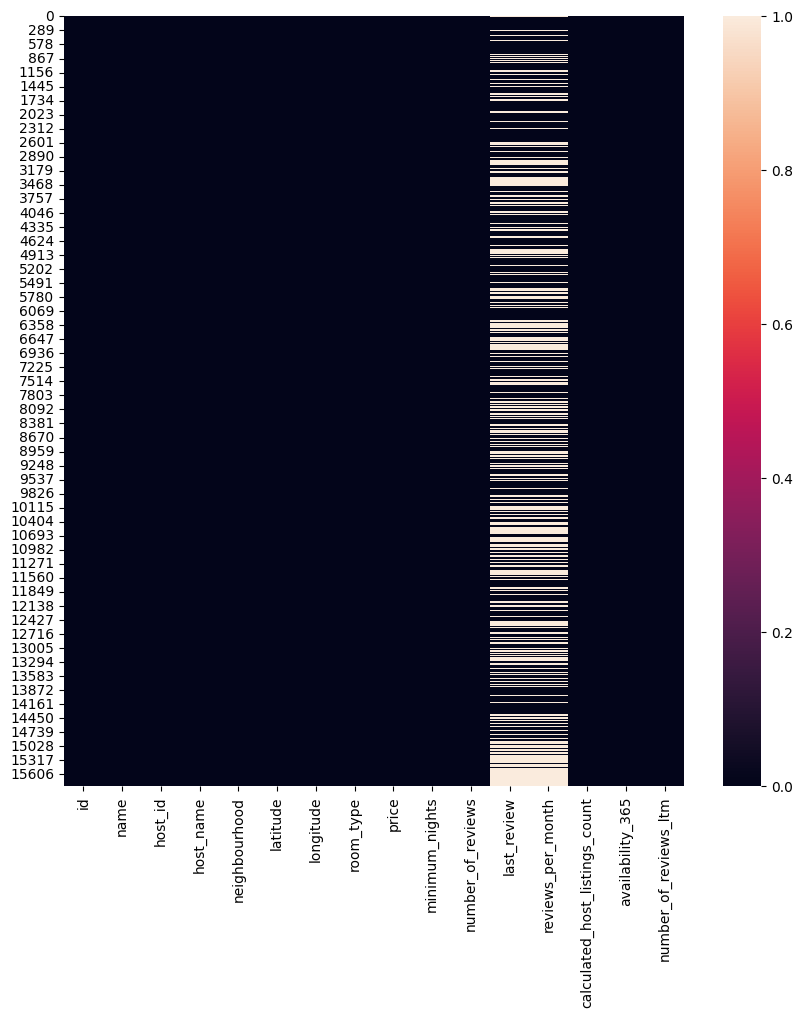

In [8]:
#Check kekosongan data (kolom unnamed:o akan dikesampingkan karena kita tidak membutuhkannya)
plt.figure(figsize=(10,10))
sns.heatmap(df[['id','name','host_id','host_name','neighbourhood','latitude','longitude','room_type','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']].isna())

Beberapa hal bisa disimpulkan, 

- Tidak ditemukan data duplicate dalam data ini, sehingga tidak perlu menghapus duplicatenya.
- Data yang diproses diatas memiliki 1 kolom yang bernama unnamed: 0 yang serupa dengan "index"
- Bisa dilihat disini ada kekosongan data di 4 kolom; nama, host_name, last review dan review per month. Maka dari itu kita akan melakukan "handling missing value" dari persentasi yang terkecil terlebih dahulu.
- Dari heatmap kekosongan data bisa dilihat last_review dan reviews_per_month memiliki kekosongan yang sama.


1. Cleaning kolom Unnamed:0
- rationale : terdapat kolom unnamed:0 setelah di load file csv.
- action : kolom tersebut akan di hapus karena kita tidak memerlukannya.
- impact : Jika dihapus, tidak akan ada dampak yang signifikan karena kita sudah memiliki index tersendiri.

In [9]:
df = df.drop(columns=['Unnamed: 0'])

2. Cleaning host_name


In [10]:
df[df['host_name'].isna()]

id           name    host_id host_name neighbourhood  latitude  \
3571  19682464  Cozy Hideaway  137488762       NaN     Bang Kapi  13.76999   

      longitude     room_type  price  minimum_nights  number_of_reviews  \
3571  100.63769  Private room   1399               3                  1   

     last_review  reviews_per_month  calculated_host_listings_count  \
3571  2017-07-29               0.02                               1   

      availability_365  number_of_reviews_ltm  
3571               365                      0

In [11]:
df.dropna(subset=['host_name'],inplace=True)

3. Cleaning name

In [12]:
df[df['name'].isnull()]

id name   host_id        host_name neighbourhood  latitude  \
439    4549768  NaN  18852579          Titawan  Phra Khanong  13.69406   
544    4720818  NaN  24386225           Cherry     Din Daeng  13.77562   
572    4245018  NaN  22030043        Parichart    Bang Phlat  13.78376   
669    6148415  NaN  31895202            Chira       Bang Na  13.68276   
1030   8055144  NaN  42521288          Nantida       Vadhana  13.74126   
1282  10000742  NaN  51374914  Diamond Bangkok   Ratchathewi  13.75328   
1594  10710165  NaN  55347997      Khaneungnit       Vadhana  13.71757   
2075  13142743  NaN  73275200         Pakaphol   Khlong Toei  13.72566   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
439   100.59619     Private room   1080               5                  0   
544   100.57346     Private room   1200               1                  0   
572   100.49821     Private room   1200               1                  0   
669   100.60894  Entire home/apt   2424               2                  0   
1030  100.55761     Private room   5000               3                  0   
1282  100.52928     Private room    930               1                  6   
1594  100.60464     Private room   1000               1                  0   
2075  100.56416     Private room    850               1                  2   

     last_review  reviews_per_month  calculated_host_listings_count  \
439          NaN                NaN                               1   
544          NaN                NaN                               1   
572          NaN                NaN                               1   
669          NaN                NaN                               1   
1030         NaN                NaN                               1   
1282  2017-05-13               0.07                               1   
1594         NaN                NaN                               1   
2075  2017-12-11               0.03                               3   

      availability_365  number_of_reviews_ltm  
439                365                      0  
544                365                      0  
572                365                      0  
669                365                      0  
1030               365                      0  
1282               365                      0  
1594               365                      0  
2075               220                      0


- rationale : terdapat 8 missing value di kolom tersebut, atau 0.05 persen dari proporsi total baris di kolom tersebut

- action : Kita bisa mengisi dengan 'unspecified' dikarenakan value di kolom nama memang beragam 

- impact : Jika kita mengisi 8 baris maka kita tidak akan mengurangi keutuhan kolom name tersebut.

In [13]:
df['name'] = df['name'].fillna('not specified')

4. Cleaning last_review

- Rationale: Kolom 'last_review' berisi tanggal yang menunjukkan tanggal review terakhir untuk setiap baris. Namun, ada kekosongan di kolom ini sebesar 36.52% yang perlu ditangani. variasi tanggal berada di antara tahun 2013 sampai 2022.
- Action: Data pada kolom 'last_review' tidak akan kita butuhkan untuk kedepannya untuk dianalisis dikarenakan untuk mengetahui data yang berkaitan waktu dan review kedepannya sudah terwakili kolom 'review_per_month' dan "number_of_reviews".
- Impact: Dengan menghapusnya kita akan kehilangan informasi tanggal 'last_review' namun tidak berdampak signifikan karena kita tidak akan menggunakannya. 

In [14]:
df = df.drop(columns='last_review')

5. Cleaning review_per_month

- Rationale: Kolom 'review_per_month' berisi rata-rata nilai review per bulan untuk setiap cantuman. Namun, ada kekosongan di kolom ini sebesar 36.52% yang perlu ditangani.
- Action: Untuk menangani nilai yang hilang, maka akan diisikan dengan nilai 0. Hal ini  mencerminkan bahwa tidak ada ulasan/review yang diterima untuk bulan tersebut, mempertahankan konteks numerik kumpulan data
- Impact: Dengan menambahkan 0 untuk nilai, kita akan mengetahui bahwa memang tidak ada review selama bulan tersebut. Metode ini digunakan untuk menghindari bias dan selaras dengan data yang memiliki sifat numerik

In [15]:
df['reviews_per_month'].fillna(0, inplace=True)

6. Find and cleaning data with 0 values 

In [16]:
def find_col_value_zero(data_frame):
    zeros_column = (data_frame == 0).sum()
    return zeros_column[zeros_column > 0]

columns_with_zeros = find_col_value_zero(df)
print('Dalam Angka Bulat:')
print(columns_with_zeros)
print()
print('Dalam Persentase:')
print(columns_with_zeros/df.shape[0])


Dalam Angka Bulat:
price                       1
number_of_reviews        5790
reviews_per_month        5790
availability_365          857
number_of_reviews_ltm    9219
dtype: int64

Dalam Persentase:
price                    0.000063
number_of_reviews        0.365231
reviews_per_month        0.365231
availability_365         0.054059
number_of_reviews_ltm    0.581530
dtype: float64


7. Decision on 0 values at 'price' column

In [17]:
df[df['price']==0]

id                           name    host_id  \
11103  44563108  Somerset Maison Asoke Bangkok  360620448   

                   host_name neighbourhood  latitude  longitude   room_type  \
11103  Somerset Maison Asoke       Vadhana  13.73815   100.5642  Hotel room   

       price  minimum_nights  number_of_reviews  reviews_per_month  \
11103      0               1                  0                0.0   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
11103                               1                 0                      0

- Rationale: Kolom price memiliki satu nilai yang sama dengan 0
- Action: Untuk menangani nilai ini, kita akan menghapusnya karena nilai price 0 inkonsisten dengan kolom price yang lain, dan tidak ditemukan adanya harga promosi seharga 0 di airbnb 
- Impact: Dengan menghapusnya, tidak akan berdampak signifikan karena hanya 1 yang kita hapus.

In [18]:
df.drop(df[df['price'] == 0].index, inplace=True)

8. Decision on 0 values at 'availability_365' column

- Rationale: Kolom availability_365 memiliki 857 nilai yang sama dengan 0.
- Action: Untuk menangani nilai ini, kita akan membiarkan nilai 0, karena  nilai 0 ini menandakan tempat tersebut sudah di-booking, dan bisa jadi telah dibooking dengan Long-Term Rental yang menandakan room tersebut sudah dipesan lebih dari 6 bulan.
- Impact: Dengan membiarkannya, kita aka menjaga keutuhan informasi di kolom tersebut.

9. Decision on 0 values at 'number_of_reviews' column 

- Rationale: Kolom number_of_reviews memiliki 5784 nilai yang sama dengan 0. Hal ini didasari karena data missing-value sebelumnya sudah diisi 0
- Action: Untuk menangani nilai ini, kita akan membiarkan nilai 0, karena  nilai 0 ini menandakan tidak ada reviewnya di tempat tersebut.
- Impact: Dengan membiarkannya, kita aka menjaga keutuhan informasi di kolom tersebut.


10. Decision on 0 values at reviews_per_month column

In [19]:
#Mengecek apakah baris bernilai 0 di reviews_per_month sama dengan baris number_of_reviews
missing_a = df[df['reviews_per_month']==0]
missing_b = df[df['number_of_reviews']==0]

same_missing_row_number = np.array_equal(missing_a, missing_b)

print("Baris/kecocokan bernilai 0 di reviews_per_month sama dengan baris bernilai 0 di number_of_reviews = ", same_missing_row_number)

Baris/kecocokan bernilai 0 di reviews_per_month sama dengan baris bernilai 0 di number_of_reviews =  True


- Rationale: Kolom review_per_month memiliki 5784 nilai yang sama dengan 0. Hal ini didasari karena data tersebut berasal dari review_per_month
- Action: Untuk menangani nilai ini, kita akan membiarkan nilai 0, karena  nilai 0 ini menandakan tidak ada reviewnya di bulan-bulan tersebut karena didasari dengan number of reviews.
- Impact: Dengan membiarkannya, kita aka menjaga keutuhan informasi di kolom tersebut.

11. Decision on 0 values at number_of_reviews_ltm column

- Rationale: Kolom number_of_reviews_ltm memiliki 9211 nilai yang sama dengan 0.
- Action: Untuk menangani nilai ini, kita akan menghapus kolom tersebut dikarenakan sudah cukup informasi yang kita dapatkan dari kolom review_per_month .
- Impact: Dengan menghapusnya, kita mungkin kehilangan informasi untuk kolom tersebut namun dengan menghapusnya, kita bisa mengurangi redudancy informasi terhadap review.

In [20]:
df = df.drop(columns='number_of_reviews_ltm')

12. Rename column

In [21]:
df.head(0)

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []

- Rationale: Kolom kedua dari kiri atau name memiliki kata-kata deskripsi atau caption untuk tempat rental di setiap barisnya.
- Action: Agar tidak memberikan impresi yang ambigu tentang kolom 'name' maka kolom tersebut akan diganti dengan 'place_description' untuk lebih menggambarkan apa yang ada di kolom itu. Di kolom tersebut deskripsi ada yang berbeda-beda bahasa, untuk perbedaan bahasa akan kita biarkan untuk menjaga keutuhannya. 
- Impact: Dengan mengganti judul kolom, pengertian judul kolom tersebut diharapkan menjadi lebih jelas. 

In [22]:
#name menjadi place_description
df.rename(columns={'name': 'place_description'}, inplace=True)
df.head(0)

Empty DataFrame
Columns: [id, place_description, host_id, host_name, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []

13. Other Anomalies

pada data tersebut kita bisa melihat name atau place_description memiliki banyak set-duplikasi, yang artinya ada beberapa baris yang menjelaskan deskripsi yang sama.

In [23]:
print('Jumlah deskripsi unik = ',df["place_description"].nunique())
print('Baris = ',len(df))
print('Selisih = ',len(df) - df["place_description"].nunique())
df["place_description"].value_counts().head(5)

Jumlah deskripsi unik =  14793
Baris =  15852
Selisih =  1059


place_description
New!  La Chada Night Market studio 2PPL near MRT      45
New!  La Chada Night Market 1BR 2PPL near MRT         35
30days! AirportLink Sukhumvit NANA MaxValu 2BR(4P)    35
New! Gateway/ Bangkok University 1BR 2PPL near BTS    29
30days!  Sukhumvit NANA spacious 1BR 2PPL near BTS    25
Name: count, dtype: int64

In [24]:
df[df['place_description']=='New!  La Chada Night Market studio 2PPL near MRT'].head(3)

id                                 place_description    host_id  \
8138  35326727  New!  La Chada Night Market studio 2PPL near MRT  201677068   
8495  37467488  New!  La Chada Night Market studio 2PPL near MRT  201677068   
8512  37103316  New!  La Chada Night Market studio 2PPL near MRT  201677068   

     host_name neighbourhood  latitude  longitude        room_type  price  \
8138     Curry   Huai Khwang  13.77094  100.58137  Entire home/apt    968   
8495     Curry   Huai Khwang  13.77228  100.57953  Entire home/apt   1000   
8512     Curry   Huai Khwang  13.76507  100.58662  Entire home/apt   1000   

      minimum_nights  number_of_reviews  reviews_per_month  \
8138              30                 37               0.86   
8495               1                 18               0.44   
8512               1                 39               0.95   

      calculated_host_listings_count  availability_365  
8138                             228               364  
8495                             228                 0  
8512                             228                 0

Terlihat ada begitu banyak deskripsi yang memiliki duplikasi, dari informasi tesebut timbul suatu pertanyaan yaitu.

- apakah deskripsi yang sama tersebut memliki bangunan berbeda atau bangunan yang sama, karena tidak akan adil jika kita menganalisis 45 tempat itu secara terpisah bilamana kita ingin mengetahui berapa banyak tempat rental di suatu kota. 
    - Contoh, Kita ingin mengetahui banyaknya rental airbnb di distrik Huai Khwang, jika kita langsung memasukan datanya, tempat dengan nama 'New! La Chada Night Market studio 2PPL near MRT' akan ada 45 kali. Otomatis akan menaikkan  atau menggelembungkan(bubble) jumlah tempat rental di kota itu sendiri. 
- Namun perlu diketahui bisa jadi ada nama deskripsi yang sama untuk lokasi/distrik yang berbeda, kita perlu hati hati dengan hal tersebut

- Hal lain yang perlu diketahui adalah, bilamana ada satu host yang memposting rentalnya berkali-kali karena room_typenya.
    - Contoh, ada satu host yang memiliki satu bangunan namun menyewakan per-masing-masing kamar dengan fasilitas berbeda ibarat kata kamar kos kalau di Indonesia. Untuk hal ini maka akan kita perhatikan juga room_type nya.
    
Maka dari itu saya akan 'flattened the data' atau mengambil satu data dari tiap redundacy di kolom 'place_description'. Namun saya akan mengelompokkannya berdasarkan 'neighbourhood' dan 'room_type'

- Beberapa hal lain seperti kolom host_name dan host_id akan saya simpulkan dari host_id dan host_name yang namanya muncul paling banyak. 
- Untuk 'price' sendiri saya akan mengambil mediannya.
- untuk kolom-kolom lain saya akan mengambil value yang pertama atau 'first' dari masing-masing di setiap kolomnya.

In [25]:
#Library untuk mencari host_name yang paling sering muncul.
from collections import Counter

df = df.groupby(['place_description', 'neighbourhood','room_type'], as_index=False).agg(
    {'host_id': lambda i: Counter(i).most_common(1)[0][0],
     'host_name': lambda i: Counter(i).most_common(1)[0][0],
     'latitude':'first',
     'longitude':'first',
     'price': 'median',
     'minimum_nights':'first',
     'number_of_reviews':'first',	
     'reviews_per_month' :'first',	
     'calculated_host_listings_count':'count',	
     'availability_365':'first'}
     )
df.head(3)

place_description neighbourhood  \
0  !!!OMG!!/4 mins to Train St./Train Market/火车头夜市   Huai Khwang   
1    !NEW! Ultra Modern Condo-Sky Pool-Terminal 21       Vadhana   
2  " Cozy and Warm house in Samsen /Dusit Bangkok"         Dusit   

         room_type    host_id       host_name  latitude  longitude   price  \
0  Entire home/apt  176686914             Bon  13.76060  100.56777  1433.0   
1  Entire home/apt  359746382  Shazzy & Sasan  13.73897  100.56043  2983.0   
2  Entire home/apt   59260623           Goong  13.78462  100.51833   750.0   

   minimum_nights  number_of_reviews  reviews_per_month  \
0               4                 27               0.74   
1               1                  5               3.33   
2               1                  3               0.78   

   calculated_host_listings_count  availability_365  
0                               1                82  
1                               1                59  
2                               1               162

- Namun karena ada flattened data, maka value di kolom calculated_host_listings_count juga akan berubah. Kita akan memanipulasinya dengan melihat jumlah masihng-masing host_name dan countnya dari dataframe yang baru ini.

In [26]:
df['calculated_host_listings_count'] = df.groupby(['host_name']).transform('size')
df.head(3)

place_description neighbourhood  \
0  !!!OMG!!/4 mins to Train St./Train Market/火车头夜市   Huai Khwang   
1    !NEW! Ultra Modern Condo-Sky Pool-Terminal 21       Vadhana   
2  " Cozy and Warm house in Samsen /Dusit Bangkok"         Dusit   

         room_type    host_id       host_name  latitude  longitude   price  \
0  Entire home/apt  176686914             Bon  13.76060  100.56777  1433.0   
1  Entire home/apt  359746382  Shazzy & Sasan  13.73897  100.56043  2983.0   
2  Entire home/apt   59260623           Goong  13.78462  100.51833   750.0   

   minimum_nights  number_of_reviews  reviews_per_month  \
0               4                 27               0.74   
1               1                  5               3.33   
2               1                  3               0.78   

   calculated_host_listings_count  availability_365  
0                               2                82  
1                               1                59  
2                               1               162

- Rationale : Adanya baris duplikat namun tidak di semua kolom, tetapi akan berpengaruh pada analisis
- Action: Melakukan flattened data untuk mengoptimalkan analisa kedepannya.
- Impact: Jumlah baris akan berkurang namun data sifat data akan lebih fair.

14. Handling Outliers

- Kita akan menganalisa outliers

In [27]:
df.groupby('room_type').size().reset_index(name='count')

room_type  count
0  Entire home/apt   8264
1       Hotel room    615
2     Private room   5566
3      Shared room    453

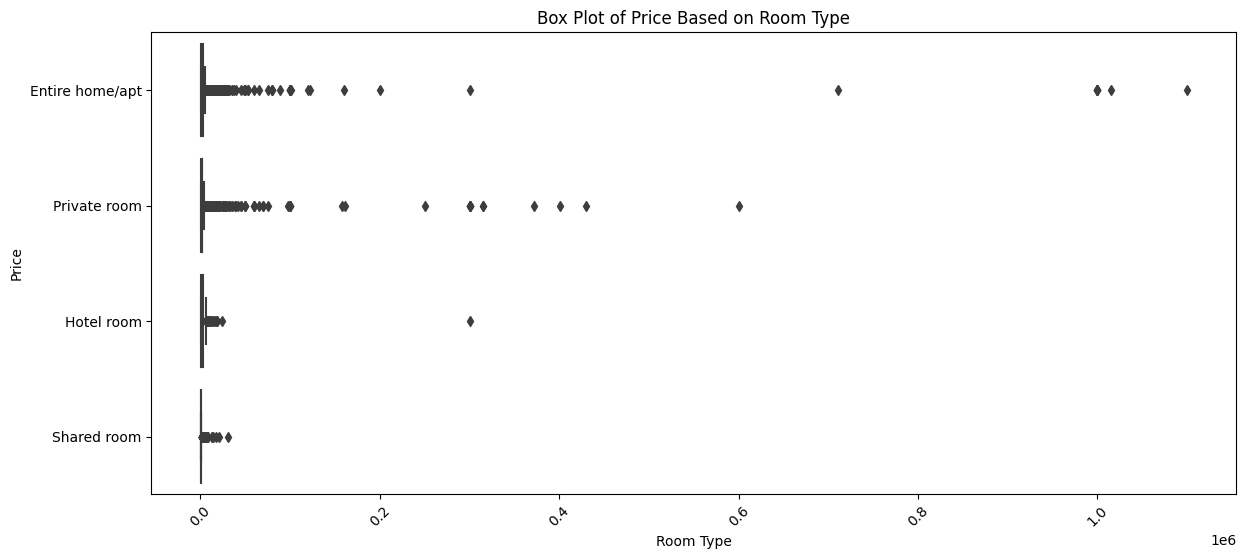

In [28]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, y='room_type', x='price')
plt.xticks(rotation=45)
plt.title('Box Plot of Price Based on Room Type')

plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

Terlihat ada beberapa outliers di kolom 'price', terutama di tipe Entire home/apt

In [29]:
df.groupby('room_type')['price'].max()

room_type
Entire home/apt    1100000.0
Hotel room          300000.0
Private room        600700.0
Shared room          31200.0
Name: price, dtype: float64

Harga maksimal di Entire home/apt adalah 1,100,000 Thailand Baht per malam, yang menjadi outliers terbesar, namun perlu kita periksa apakah memang ada yang semahal itu atau tidak. Kita akan memeriksanya dengan mengecek website airbnb bangkok langsung.

![pandas](air_bnb_maxprice.png)

Diketahui bahwa salah satu harga dari informasi yang diambil di website airbnb Bangkok ada yang tipe entire home/apt berharga 1.009.856 Baht. 

![pandas](air_bnb_maxprice2.png)

Serta ada harga untuk tipe hotel dan shared room yang masing-masing memiliki angka yang besar = 207.105 dan 240.117 Baht 

Terlihat dari pencarian harga di airbnb sendiri, memang ada harga-harga yang semahal itu seperti yang terilhat di outliers diatas.

Maka dari itu outliers 'price' akan dibiarkan saja, namun kedepannya, central tendency yang akan digunakan adalah Median dikarenakan jumlah outliers yang begitu banyak.

- Outliers Minimum Night

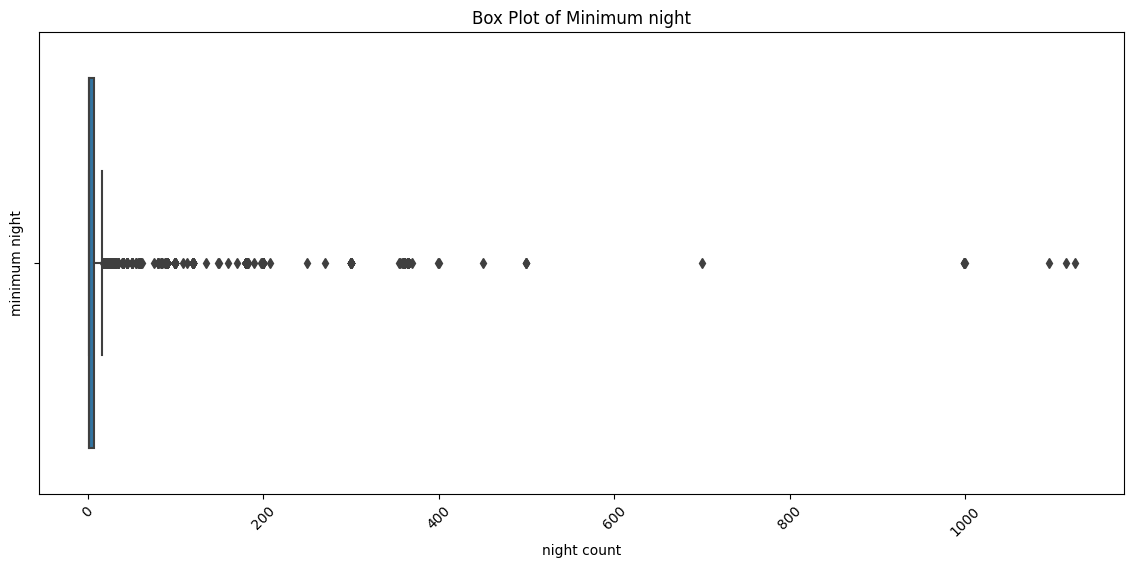

In [30]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='minimum_nights')
plt.xticks(rotation=45)
plt.title('Box Plot of Minimum night')
plt.xlabel('night count')
plt.ylabel('minimum night')
plt.show()

In [31]:
#Angka maksimal lama periode kita tinggal yang ada di platform airbnb adalah 12 bulan, artinya kita cek yang lebih 365 hari.
print('jumlah baris minimum_night lebih dari 12 bulan = ',len(df[df['minimum_nights']>365]))
print('jumlah baris minimum_night yang satu malam = ',len(df[df['minimum_nights']==1]))


jumlah baris minimum_night lebih dari 12 bulan =  15
jumlah baris minimum_night yang satu malam =  7615


- Kita bahas dahulu kenapa banyak outliers, hal ini ditandakan karena ada 7615 baris yang memunculkan jumlah minimum_night 1 hari saja. Artinya titik tengahnya ada di angka 1
- Ada 15 baris yang notabenya lebih banyak dari 12 bulan. Contohnya:

In [32]:
df[df['minimum_nights']>365].head(2)

place_description neighbourhood        room_type  \
946   2 Bedroom Suite@Kirthana Residence       Vadhana  Entire home/apt   
1505  30th floor, 10 min to BTS, Seaview       Bang Na  Entire home/apt   

       host_id host_name  latitude  longitude    price  minimum_nights  \
946   64131143    Chetna  13.73917  100.56616   7286.0             500   
1505   4517723  Kannicha  13.66417  100.64955  35000.0             998   

      number_of_reviews  reviews_per_month  calculated_host_listings_count  \
946                   0               0.00                               3   
1505                 20               0.26                               7   

      availability_365  
946                 48  
1505               365

- Setelah diperiksa aplikasinya, di platform airbnb dengan fitur 'berapa lama kita akan tinggal' itu maksimal 12 bulan, dan bila ada host yang melakukan hal itu, maka di akhir tahun, minimum_night mereka akan ter-reset.

- Untuk itu, kita bisa asumsikan, bahwa minimum night yang lebih dari setahun adalah suatu anomali, salah satu asumsi saya adalah bahwa host lupa dalam melakukan ketelitian 'setting' pada fitur minimum_nightnya.

- Kita ganti angka yang lebih dari 365 menjadi 365 saja sesuai dengan standar 365 hari setahyun.

- Untuk analisis data nantinya kita hanya akan membagi 2 kategori untuk kolom minimum_night, yaitu short-term rental untuk minimum_night < 28 hari, dimana sisanya akan dikategorikan sebagai long-term rental. 

In [33]:
df['minimum_nights'] = np.where(df['minimum_nights'] > 365, 365, df['minimum_nights'])

- Rationale = Ditemukan outliers di 2 kolom utama yang akan kita analisis, price dan minimum night
- Action = untuk kolom price akan kita biarkan sesuai dengan tujuannya, sedangkan untuk minimum night kita lakukan manipulasi data.
- Impact = untuk price sendiri tidak akan terlalu berdampak, namun untuk kolom minimum night, frekuensi 365 akan lebih banyak, akan tetapi karena kita hanya akan mengkategorikan 2 hal (<28 nights dan 28>nights) maka, hal itu tidak akan berdampak signifikan

### 15. Unique in columns:

In [34]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique','sample unique'],
                     data=listItem)
print(df.shape)
dfDesc

(14898, 13)


dataFeatures dataType  null  unique  \
0                place_description   object     0   14793   
1                    neighbourhood   object     0      50   
2                        room_type   object     0       4   
3                          host_id    int64     0    6646   
4                        host_name   object     0    5303   
5                         latitude  float64     0    9282   
6                        longitude  float64     0    9905   
7                            price  float64     0    3043   
8                   minimum_nights    int64     0      74   
9                number_of_reviews    int64     0     298   
10               reviews_per_month  float64     0     507   
11  calculated_host_listings_count    int64     0      49   
12                availability_365    int64     0     366   

                                        sample unique  
0   [อพาร์ทเมนต์วันหยุดแสนสบายและสะดวกสบาย, Privat...  
1                             [Bang Rak, Ratchathewi]  
2                       [Entire home/apt, Hotel room]  
3                              [156156031, 142819539]  
4                                     [Izii, Wallaya]  
5                               [13.76578, 13.724123]  
6                              [100.52767, 100.55321]  
7                                    [1429.0, 1261.0]  
8                                            [85, 89]  
9                                          [114, 330]  
10                                       [1.19, 4.67]  
11                                           [37, 91]  
12                                          [26, 219]

Setelah dilakukan cleaning data dan flattened data, maka tabel diatas memberikan informasi bahwa tidak ada lagi kekosongan nilai, serta beberapa informasi penting dari kolom unique adalah
- place_description ada 14793, setelah dilakukan flattened data. Jumlah baris sendiripun diketahui ada 14898 baris. Ada selisih namun tidak bermasalah karena memang ada place description yang sama di distrik berbeda.
- host_id : ada 6646 jumlah id pemilik rental.
- host_name : ada 5303 jumlah host_name, Diketahui ada perbedaan untuk unique diantara kolom host_id dan host_name. Itu artinya ada pemilik/host_name yang memiliki lebih dari satu tempat rental.
- neighbourhood : 50, diketahui bahwa ada 50 distrik di kota Bangkok yang ada di data.
- room type : diketahui ada 4 tipe sebelumnya yaitu entire home/apt, hotel, private room dan shared room.
- perbedaan jumlah unique antar kolom lattitude dan longitude tidak bermasalah karena memang ada latitude(koordinat garis horizontal) yang sama dengan host lain namun dibedakan dengan longitude, begitu pula sebaliknya.

## Melakukan penyimpanan data yang sudah cleaned ke file csv baru

In [35]:
df_cleaned = df
df_cleaned.head(1)
df_cleaned.to_excel('airbnb_bangkok_cleaned.xlsx')

---

Step 2 : Analisa Data
---

Sebelum masuk ke analisis yang lebih kompeherensif, ada baiknya kita melihat hal-hal umum yang bisa dipetik dari dataset kita. Hal-hal umum meliputi, 
- statistic deskriptif.
- Peta Bangkok dengan densitas terbanyak airbnb.
- Deskripsi beberapa kota yang memiliki airbnb terbanyak.
- Empat Tipe yang ada dan persebarannya di Peta Bangkok
- Dua tipe minimum_night yang dikategorikan sebagai Short-Term dan Long-Term

### 2.1 Melihat deskriptif statistik

In [36]:
summary_stats = df[['price','minimum_nights', 'number_of_reviews', 'availability_365']].describe()

# Baris '50%' atau dengan kata lainadalah median
summary_stats.round(1)

price  minimum_nights  number_of_reviews  availability_365
count    14898.0         14898.0            14898.0           14898.0
mean      3282.8            15.6               17.1             243.8
std      25741.7            47.1               41.6             125.5
min        278.0             1.0                0.0               0.0
25%        900.0             1.0                0.0             135.2
50%       1400.0             1.0                2.0             307.0
75%       2447.0             7.0               14.0             361.0
max    1100000.0           365.0             1224.0             365.0

Dari penjelasan diatas, beberapa poin yang bisa dirangkum adalah,
- Price, memiliki harga maksimal 1.100.000 yang bertipe entirehome/apt, sedangkan harga terendahnya adalah 278 yang bertipe private/room. Nilai tengah yang kita pakai atau median adalah 1400.
- minimum night adalah satu malam, sedangkan maksimal adalah 1125, seperti yang di bahas di outliers minimum_night, kita akan mengkategorikan ke short term rental dan long term rental kedepannya.
- numbers_of_review berada di median 2 butir dan availability_365 berada di median 307 hari.

Berikut deskriptif statistik untuk setiap tipe-tipenya

- Tipe Entire home/apt

In [37]:
df_entire = df[df['room_type']=='Entire home/apt']
summary_stats = df_entire[['price','minimum_nights', 'number_of_reviews', 'availability_365']].describe()
summary_stats.round(1)

price  minimum_nights  number_of_reviews  availability_365
count     8264.0          8264.0             8264.0            8264.0
mean      3571.1            21.2               23.1             223.6
std      31228.1            53.7               46.7             124.2
min        332.0             1.0                0.0               0.0
25%       1000.0             1.0                0.0             108.0
50%       1520.0             3.0                5.0             246.0
75%       2597.0            28.0               25.0             347.0
max    1100000.0           365.0             1224.0             365.0

- Tipe Entire hotel

In [38]:
df_hotel = df[df['room_type']=='Hotel room']
summary_stats = df_hotel[['price','minimum_nights', 'number_of_reviews', 'availability_365']].describe()
summary_stats.round(1)

price  minimum_nights  number_of_reviews  availability_365
count     615.0           615.0              615.0             615.0
mean     3039.3             1.9               20.2             264.7
std     12278.0             6.3               55.9             134.2
min       318.0             1.0                0.0               0.0
25%      1000.0             1.0                0.0             177.0
50%      1700.0             1.0                2.0             347.0
75%      3179.0             1.0               14.0             363.0
max    300000.0           113.0              486.0             365.0

- Tipe Entire Private room

In [39]:
df_private = df[df['room_type']=='Private room']
summary_stats = df_private[['price','minimum_nights', 'number_of_reviews', 'availability_365']].describe()
summary_stats.round(1)

price  minimum_nights  number_of_reviews  availability_365
count    5566.0          5566.0             5566.0            5566.0
mean     3070.1             9.7                9.0             268.5
std     17554.2            38.7               30.2             121.5
min       278.0             1.0                0.0               0.0
25%       800.0             1.0                0.0             178.0
50%      1212.0             1.0                0.0             347.0
75%      2100.0             2.0                4.0             364.0
max    600700.0           365.0              807.0             365.0

- Tipe Shared room

In [40]:
df_shared = df[df['room_type']=='Shared room']
summary_stats = df_shared[['price','minimum_nights', 'number_of_reviews', 'availability_365']].describe()
summary_stats.round(1)

price  minimum_nights  number_of_reviews  availability_365
count    453.0           453.0              453.0             453.0
mean     966.5             3.3                5.9             279.0
std     2291.2            24.7               17.0             118.8
min      280.0             1.0                0.0               0.0
25%      390.0             1.0                0.0             179.0
50%      489.0             1.0                0.0             360.0
75%      705.0             1.0                3.0             365.0
max    31200.0           365.0              153.0             365.0

4 statistik deskriptif diatas untuk tipe bertujuan untuk melihat beberapa informasi umum

### 2.2 Melihat Persebaran jumlah airbnb di distrik Bangkok melalui folium

In [41]:
#Tabel untuk peta Bangkok(distrik dan jumlah hosting airbnb untuk semua tipe)
df_map = df.groupby('neighbourhood')['place_description'].count().reset_index()
df_map.sort_values(by='place_description',ascending=False).head(3)

neighbourhood  place_description
47       Vadhana               2028
22   Khlong Toei               1912
18   Huai Khwang               1008

In [42]:
from folium.plugins import HeatMap

bangkok_map = folium.Map(location=[13.736717, 100.523186], zoom_start=10, tiles='Stamen Terrain')

#untuk membuat range.
bins_range = df_map['place_description'].quantile([0, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.65, 0.8, 0.95, 0.99, 1])
bins_range 
# file geojson bangkok, neighbourhood:
bangkok_geojson = 'bangkok_neighbourhoods.geojson'

# Choropleth
chor_neighbourhood = folium.Choropleth(
    geo_data= bangkok_geojson,          # file geojson (data geospatial)
    data= df_map,                           # dataframe pandas
    columns= ['neighbourhood', 'place_description'],   # kolom dataframe yg dipakai
    key_on= 'properties.neighbourhood',   # indexing nama kelurahan dlm file geojson untuk join dengan dataframe pandas
    fill_color = "YlOrRd",
    fill_opacity = 0.8,
    line_opacity = 0.7,
    legend_name = 'HeatMap Area of count airbnb location',
    bins= bins_range
)
chor_neighbourhood.add_to(bangkok_map)
bangkok_map

- Terlihat dari petanya, semakin ke pusat kota maka semakin banyak hosting airbnb disitu. Untuk lebih memperjelas maka kita akan membuat barchartnya.

2.3 Deskripsi beberapa distrik yang memiliki densitas airbnb terbanyak

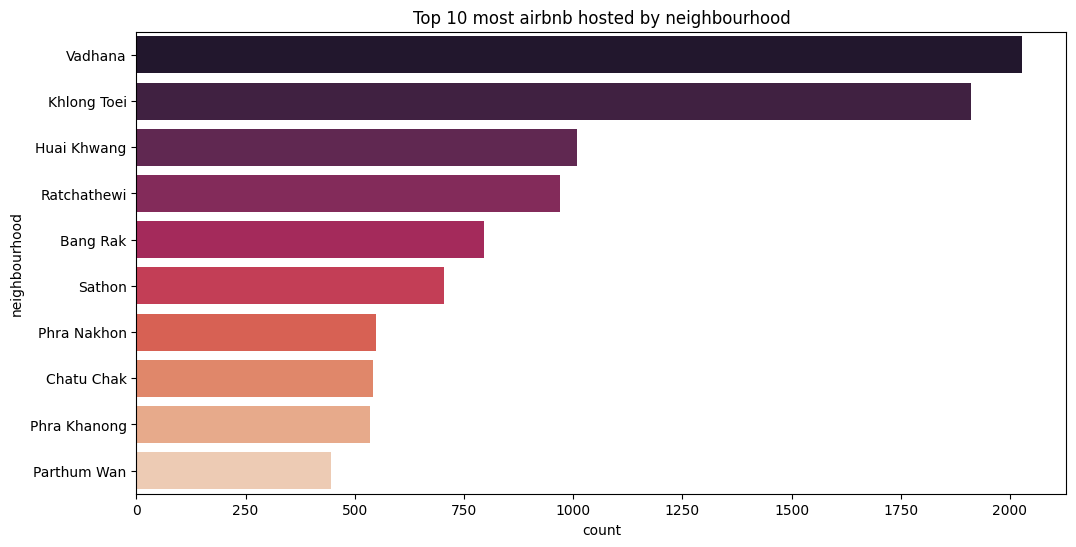

In [43]:
plt.figure(figsize=(12,6))
top_neighbourhoods = df['neighbourhood'].value_counts().head(10)
sns.countplot(data=df, y='neighbourhood', order=top_neighbourhoods.index, palette='rocket')
plt.title('Top 10 most airbnb hosted by neighbourhood')
plt.xticks(rotation=0);

In [44]:
top_neighbourhoods

neighbourhood
Vadhana         2028
Khlong Toei     1912
Huai Khwang     1008
Ratchathewi      969
Bang Rak         797
Sathon           705
Phra Nakhon      549
Chatu Chak       541
Phra Khanong     536
Parthum Wan      446
Name: count, dtype: int64

Dari 10 tempat yang paling banyak hosting airbnb, mari kita lihat keunikan kotanya masing-masing.
- Vadhana = Salah satu pusat kota Bangkok, dimana Vadhana artinya 'perkembangan', distrik ini adalah distrik ekonomi termaju di bangkok dan banyak sarana perbelanjaan disini.
- Khlong Toei = Berada di sentral kota, terkenal dengan distrik kelas atas, dimana memiliki perkantoran, hotel dan restoran mewah. Pelabuhan Bangkok pun ada di daerah ini. Serta distrik ini memiliki adalah 'slum' of Bangkok dimana memiliki penduduk dan rumah yang sangat padat.
- Huai Khwang = Salah satu pusat kota Bangkok, berada sangat sentral dan juga area perumahan di Bangkok. Distrik ini memiliki nilai yang disebut Thailand cultural center, serta dijuluki Chinatown Thailand. Keunikan lainnya adalah sebagai atraksi pasar malam Bangkok.
- Ratchathewi = Distrik yang areanya kecil namun menjadi pusat transportasi di bangkok. Banyak pendatang yang beristirahat di daerah ini.
- Bang Rak = Terkenal dengan area hiburannya, memiliki bar/pub dan rooftop ternama karena memiliki lokasi dan panorama pemandangan yang indah. Banyak event dunia malam yang terjadi disini.
- Sathon =  Distrik dengan komersial yang besar dan gedung tinggi pencakar langit, daerah perkantoran, dan kondominium kelas atas. Memiliki area luas dan kepadatan penduduk yang tinggi. Disebut sebagai area 'hedon' di Bangkok.
- Phra Nakhon = Lokasi yang memiliki banyak cagar budaya seperti patung dan kuil. Tempat utama parawisata.
- Chatu Chak (Chatuchak) = Daerah yang memiliki banyak pusat perbelanjaan sehingga disebut 'Largest Weekend Market'.
- Phra Khanong = Distrik dengan residensial yang banyak.
- Parthum Wan = Universitas terbaik Thailand menurut QS University Rank yaitu Chulalongkorn University berada di distrik ini. Area inipun disebut 'the most luxurious place' di Bangkok. Hal lain adalah pusat perbelanjaan Siam, lokasi terkenal shopping centre Thailand ada di area ini. Area ini dijuluki Heart of Bangkok Market. Lokasi sub area SIAM ini pun dijuluki tanah termahal di Thailand.

Tiga Neighbourhood yang memiliki densitas airbnb paling sedikit.

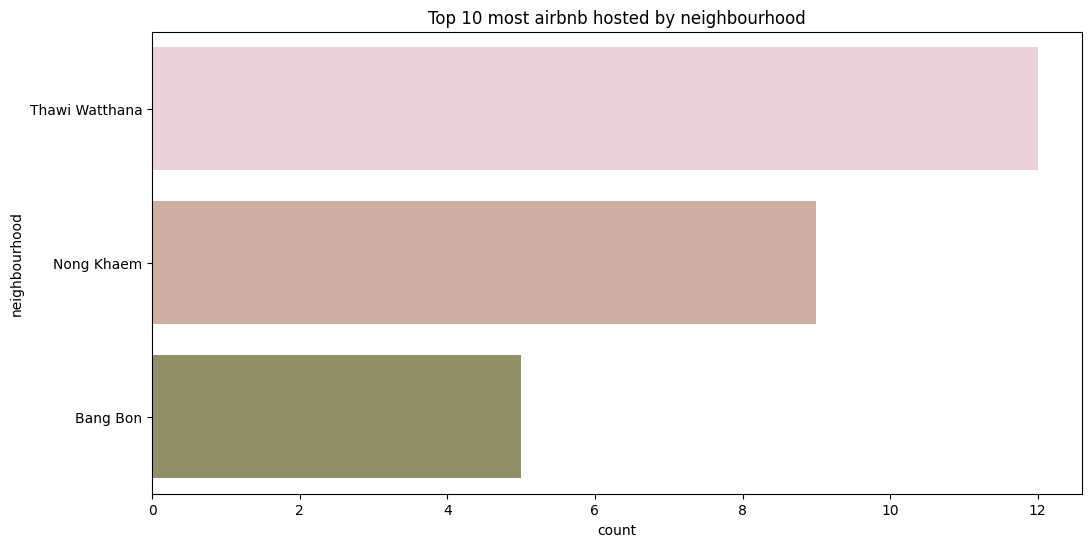

In [45]:
plt.figure(figsize=(12,6))
bottom_neighbourhoods = df['neighbourhood'].value_counts().tail(3)
sns.countplot(data=df, y='neighbourhood', order=bottom_neighbourhoods.index, palette=sns.cubehelix_palette(rot=-.9))
plt.title('Top 10 most airbnb hosted by neighbourhood')
plt.xticks(rotation=0);

- Bang Bon (Bang Bon Tai) adalah lokasi dengan sedikit penduduk.
- Nong Khaem adalah lokasi yang bisa dibilang 'perdesaan' di wilayah bangkok.
- Thawi Watthana adalah lokasi yang terletak diujung bangkok.

### 2.4 Empat tipe airbnb di Bangkok

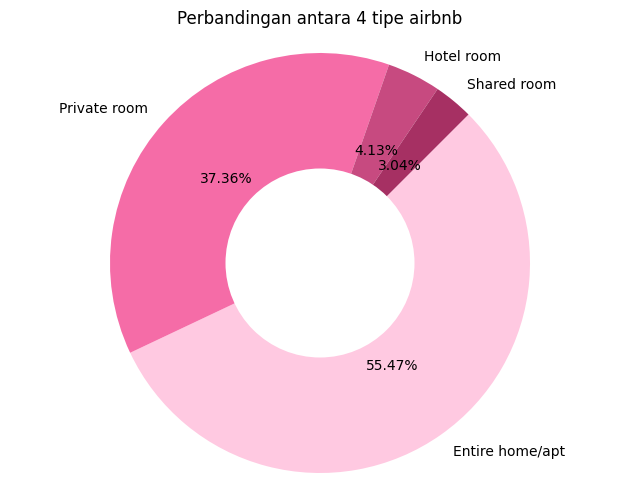

In [46]:
#Mengelompokkan berdasarkan tipe dan mengurutkannya.
df_4type = df.groupby("room_type").size().reset_index(name="count")
df_4type = df_4type.sort_values(by='count',ascending=False)

plt.figure(figsize=(8,6))
plt.pie(df_4type['count'],labels=df_4type['room_type'],autopct= '%.2f%%',colors=['#ffc9e1','#f56ca7','#c74a80','#a63063'], startangle=45,counterclock=False,textprops={'color':'black'})
plt.axis('equal')
fig=plt.gcf()
centre_circle = plt.Circle((0,0),0.45,fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Perbandingan antara 4 tipe airbnb')
plt.show()

- Terlihat dari keseluruhan bahwasannya entire home/apt dan private room adalah tipe yang paling dicari. Asumsinya adalah bahwa pengunjung lebih memilih privasinya.
- Sedangkan hotel room itu tidak terlalu banyak karena asumsinya, turis mungkin lebih memilih booking ke hotel di tempat atau hotel aslinya daripada lewat platform.
- Sedangkan shared room sangat sedikit karena kembali lagi ke asumsi bahwa turis lebih memilih privasi

### 2.5 Tipe Short-Term Stay dan Long-Term Stay 

Untuk kolom minimum_night, kita akan mengkategorikan apakah rental tersebut memiliki kriteria kurang dari 28 hari atau tidak. Definisi long-term stay sendiri adalah dimana minimum_night berjumlah setidaknya 28 hari.

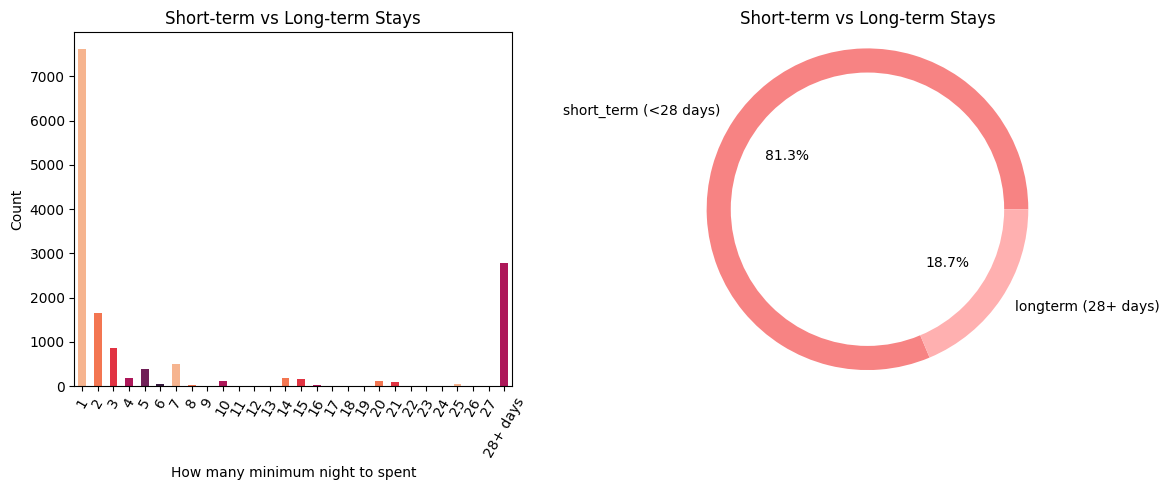

In [47]:
#membuat dataframe baru khusus untuk short-term dan long-term
df_stay = df

#Bar 1 = membuat kartegori setiap hari sampai hari ke 28+
plt.figure(figsize=(12, 5))
def categorize_nights(value):
    if value >= 28:
        return '28+ days'
    else:
        return f'{value}'
df_stay['night_category'] = df_stay['minimum_nights'].apply(categorize_nights)
custom_order = [
    f'{i}' for i in range(1, 28)
] + ['28+ days']
grouped_stay = df_stay['night_category'].value_counts().reindex(custom_order, fill_value=0)

palet = sns.color_palette("rocket_r")
# Plot untuk Bar1
plt.subplot(1, 2, 1)
grouped_stay.plot(kind='bar', title='Short-term vs Long-term Stays',color=palet)
plt.xlabel('How many minimum night to spent')
plt.ylabel('Count')
plt.xticks(rotation=60, ha='center')

# Bar 2: Bar untuk short-term dan long-term
plt.subplot(1, 2, 2)

grouped_stay2 = df_stay.groupby(df_stay['minimum_nights'] > 27)['place_description'].count()
grouped_stay2.index = ['short_term', 'long_term']

plt.pie(grouped_stay2, labels=['short_term (<28 days)', 'longterm (28+ days)'], autopct='%1.1f%%',  colors=['#f78383', '#ffb0b0'])
plt.title('Short-term vs Long-term Stays')
plt.axis('equal')
fig=plt.gcf()
centre_circle = plt.Circle((0,0),0.85,fc='white')
fig.gca().add_artist(centre_circle)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Dilihat dari barchart:
- Terlihat ada 7000 lebih listing rental yang memberikan minimum_night 1 hari saja.
- Semakin banyak minimum_nightnya sampai ke 27 days, maka kebanyakan rental yang bersedia untuk mengakomodasinya pun semakin sedikit.
- Menarik untuk dilihat di kelipatan 5 dan 7, rental yang bersedia mengakomodasi jumlah minimum_night pun lebih fluktuatif ke arah kenaikan. Hal ini didasari bahwa banyak rental yang bersedia menampung wisatawan selama seminggu hitungan hari kerja dan seminggu penuh.
- Lalu di 28+ days, banyak juga rental yang bersedia, biasanya ini dikategorikan di airbnb sebagai perbulan atau monthly rent.

Dilihat dari piechart
- Mayoritas rental yang ada didataset memilih untuk menentukan minimum_night sebagai short-term dibandingkan long-term, perbandingannya empat dibanding satu.
- Artinya, setiap 4 rental short-term maka hanya ada 1 rental yang bersifat long-term.
- Bisa diartikan bahwa turis lebih memilih menyewa perhari daripada perbulannya.

---

# 3 Analisa Data Secara Kompeherensif

Setelah kita melihat informasi umum lainnya maka kita akan menganalisa secara kompeherensif dari data yang bisa kita olah. Di setiap bagian analisis, akan kita strukturisasi dengan 3 hal yaitu:
- Objective: Tujuan dari bagian section data yang dianalisis. 
- Insight: Informasi yang kita dapatkan, baik secara umum atau pattern ataupun sebuah hal unik.
- Implication: Implikasi dan rekomendasi, ataupun impact dari rekomendasi kita jika memungkinkan. 

## 3.1 Product Optimization

Salah satu atribut yang akan kita optimalkan adalah produk. Disini kita akan menganalisis lebih lanjut terhadap produk sesuai dengan minimum hari lalu akan membahas tipe dari airbnb itu sendiri. Mari kita lihat perbandingan antara tipe dan long-term-stay/short-term-stay. 

In [48]:
df_stay.rename(columns={'night_category': 'term'}, inplace=True)
def convert_to_term_category(value):
    if value == '28+ days':
        return 'long'
    else:
        try:
            value_int = int(value)
            return 'short' if value_int <= 27 else 'long'
        except ValueError: #karena ada nilai 28+ di kolom ada '+'nya jadi yang error kita masukkan ke 'else'
            return value
df_stay['term'] = df_stay['term'].apply(convert_to_term_category)


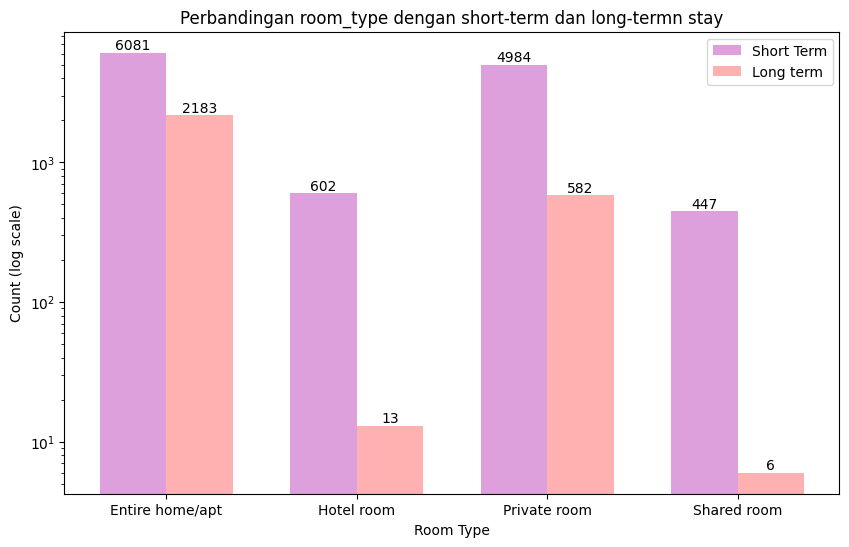

In [49]:
grouped_data = df_stay.groupby(['room_type', 'term']).size().unstack()
df_stay.groupby(['room_type', 'term']).size().unstack()

bar_width = 0.35  
index = np.arange(len(grouped_data))  

fig, ax = plt.subplots(figsize=(10, 6))

# memakai log untuk membandingkan angkanya
ax.set_yscale('log')

bar1 = ax.bar(index, grouped_data['short'], bar_width, label='Short Term',color='plum')
bar2 = ax.bar(index + bar_width, grouped_data['long'], bar_width, label='Long term',color='#ffb0b0')

ax.set_title("Perbandingan room_type dengan short-term dan long-termn stay")
ax.set_xlabel("Room Type")
ax.set_ylabel("Count (log scale)")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(grouped_data.index)
ax.legend()

for bar in bar1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

for bar in bar2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()


- Ada dua kesimpulan, pertama, pengunjung lebih memilih short term stay dikarenakan asumsinya, waktu mereka yang terbatas.
- Untuk perbandingan tipe itu sendiri, entire home/apt dan private room memiliki porsi long-term stay yang lebih banyak daripada hotel atau shared. Hal ini bisa diasumsikan lagi bahwa pengunjung lebih memilih privasi jika ingin tinggal dalam waktu yang lama.

Setelah itu mari kita bahas hostnya sendiri, karena host adalah business liaison atau penengah dalam airbnb terhadap customernya. Kita akan bahas, perbandingan host dan number of reviewnya juga.

In [50]:
grouped_product = df.groupby('host_name').agg({'host_name': 'count', 'number_of_reviews': 'sum'})
grouped_product.rename(columns={'host_name': 'count_of_hostname', 'number_of_reviews': 'total_number_of_reviews'}, inplace=True)
grouped_product.reset_index(inplace=True)
top_10_hosts = grouped_product.sort_values(by='count_of_hostname', ascending=False).head(10)
top_10_reviews = grouped_product.sort_values(by='total_number_of_reviews', ascending=False).head(10)

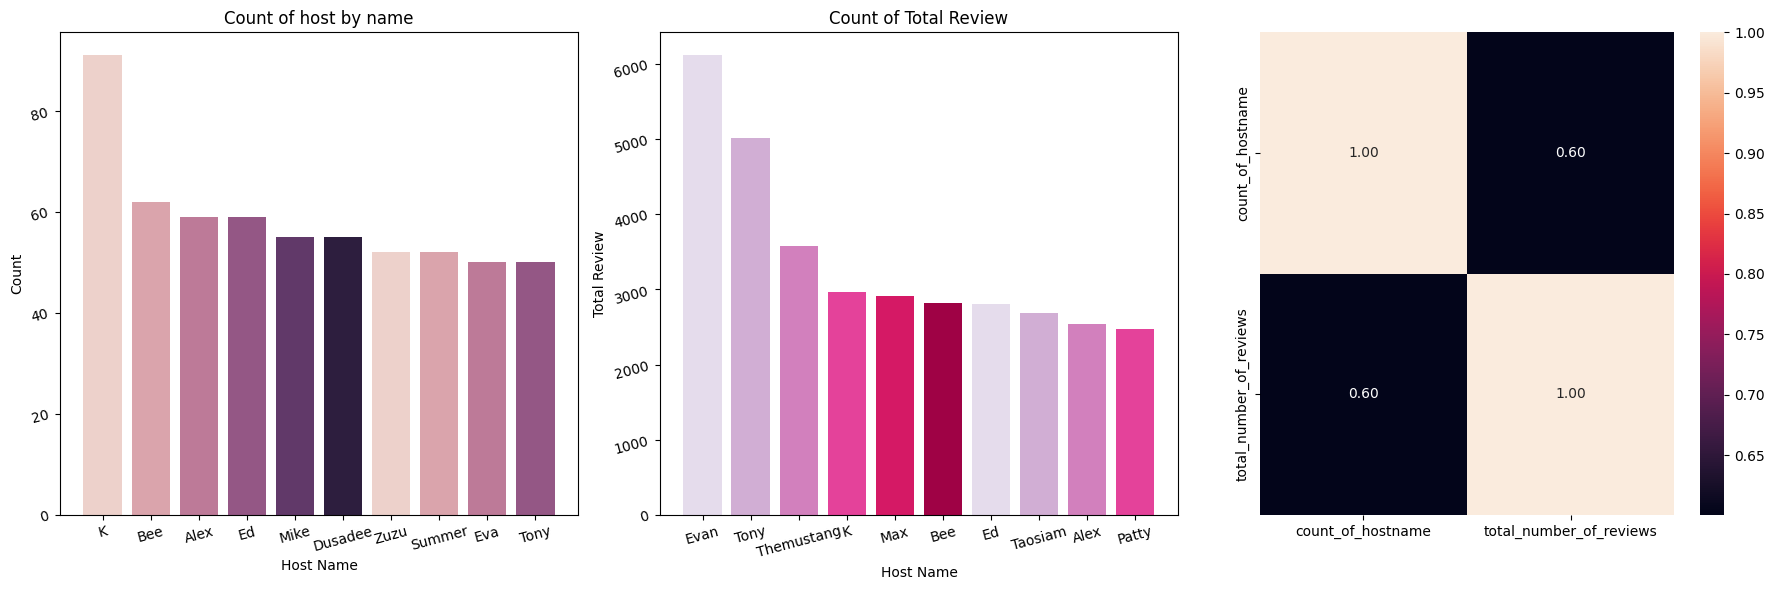

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Graph 1 - Count of host by name
axes[0].bar(top_10_hosts['host_name'], top_10_hosts['count_of_hostname'], color=sns.cubehelix_palette())
axes[0].set_title('Count of host by name')
axes[0].set_xlabel('Host Name')
axes[0].set_ylabel('Count')
axes[0].tick_params(rotation=15)

# Graph 2 - Count of Total Review
palet2 = sns.color_palette("PuRd")
axes[1].bar(top_10_reviews['host_name'], top_10_reviews['total_number_of_reviews'], color=palet2)
axes[1].set_title('Count of Total Review')
axes[1].set_xlabel('Host Name')
axes[1].set_ylabel('Total Review')
axes[1].tick_params(rotation=15)

# Graph 3 - Correlation Heatmap
correlation_product = grouped_product[['count_of_hostname', 'total_number_of_reviews']].corr()
sns.heatmap(correlation_product, annot=True, fmt=".2f", ax=axes[2])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

- terlihat bahwa host K memiliki listing rental terbanyak, dan Evan adalah host dengan review terbanyak. 
- dari heatmap kita bisa disimpulkan hampir ada pengaruh yang besar antara jumlah host listing dan jumlah reviews. Namun yang menarik adalah angka tertinggi di total review yaitu host yang bernama Evan, dia tidak masuk top 10 dari total listing terbanyak.

Setelah ini mari kita bahas analisis produk optimisasinya.

Objective: Melihat tipe airbnb, kategori lama periode lamanya tinggal dan hostnya itu sendiri.

Insight: Beberapa Hal yang bisa kita ambil,
- Tipe airbnb yang paling populer adalah entire home/apt disusul oleh private room
- K adalah host yang memiliki listing terbanyak dan masuk top 10 jumlah review terbanyak.
- Evan memiliki jumlah review terbanyak namun tidak masuk total listing terbanyak.

Implikasi dan rekomendasi:
- Disini airbnb bisa terus melakukan optimasi terhadap pencarian host baru lebih tertarik untuk melnginvestasi keseluruhan bangunannya, karena yang populer adalah entire home/apt. 
- Namun untuk shared room tersendiri yang berjumlah paling rendah, airbnb mungkin bisa menginfluensi para shared room host untuk memberikan amenities/fasilitas yang lebih.
- Airbnb bisa memberikan reward kepada host K dan Evan dikarenakan mereka berdua memiliki influensi kuat dalam airbnb ini. Dan juga airbnb bisa melakukan kompetisi atau loyalty program untuk memotivasi host-host lainnya.  

## 3.2 Price Optimization

Setelah menganalisis produk maka kita akan menganalisis harga.

- Di analisis data price, kita akan memakai median, namun ada hal penting yang harus kita perhitungkan, yaitu jumlah minimum tempat rental ada di suatu distrik. Kita bisa mengatakannya dengan istilah threshold. Hal ini penting, contohnya jika kita tidak batasi limitnya maka sebuah distrik yang memiliki 2 tempat untuk tipe shared room dan harga yang berbeda jauh akan memiliki median price yang besar.

In [52]:
df[(df['neighbourhood'] == 'Bang Khun thain') & (df['room_type'] == 'Shared room')]

place_description    neighbourhood    room_type    host_id  \
13644  ทัศนีย์ วุฒิ สมาร์ทคอนโด  Bang Khun thain  Shared room  294846483   
13860       อพาร์ทเมนท์ Antioch  Bang Khun thain  Shared room  213263577   

       host_name  latitude  longitude    price  minimum_nights  \
13644  Premkamol  13.65817  100.42720    700.0               4   
13860    William  13.64187  100.43535  13852.0               1   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
13644                  0                0.0                               1   
13860                  0                0.0                               9   

       availability_365   term  
13644               269  short  
13860                90  short

- Mediannya price shared room didistrik itu ada di kisaran harga 7000an karena hanya ada 2 data, padahal median price shared room keseluruhan distrik adalah 489. Jika kita ingin dibandingkan dengan distrik-distrik lain maka Bang Khun thain bisa jadi menempati posisi median tertinggi.  Sebenarnya hal ini bisa saja terjadi namun karena tujuan analisis setelah ini adalah melihat median price dari masing-masing tipe berdasarkan neighbourhood maka di perlukan threshold untuk membatasinya.

In [53]:
#Mencari jumlah total pertipe
df.groupby("room_type").size().reset_index(name="count")

room_type  count
0  Entire home/apt   8264
1       Hotel room    615
2     Private room   5566
3      Shared room    453

In [54]:
#Type count = menambah kolom baru untuk menjumlahkan angka total per distrik dan pertipenya
type_counts = df.groupby(['neighbourhood', 'room_type']).size().reset_index(name='type_count')
df = df.merge(type_counts, on=['neighbourhood', 'room_type'], how='left')

In [55]:
#Threshold, jadi kita bisa batas bawah limit untuk pertipenya
df.groupby('room_type')['type_count'].quantile(0.1)

room_type
Entire home/apt    90.0
Hotel room          9.0
Private room       58.0
Shared room         6.0
Name: type_count, dtype: float64

In [56]:
#Melakukan filter dengan memakai limit jumlah, intinya yang dibawah angka tersebut tidak dimasukkan ke perhitungan median price per neighbour nantinya agar bersifat adil. 
filter_df_price = df[
    ((df["room_type"] == "Entire home/apt") & (df['type_count'] > 90)) |
    ((df["room_type"] == "Hotel room") & (df['type_count'] > 9)) |
    ((df["room_type"] == "Private room") & (df['type_count'] > 58)) |
    ((df["room_type"] == "Shared room") & (df['type_count'] > 6))
]

Setelah melakukan threshold, kita akan membandingkan median per neighbourhoodnya dan juga tipenya.

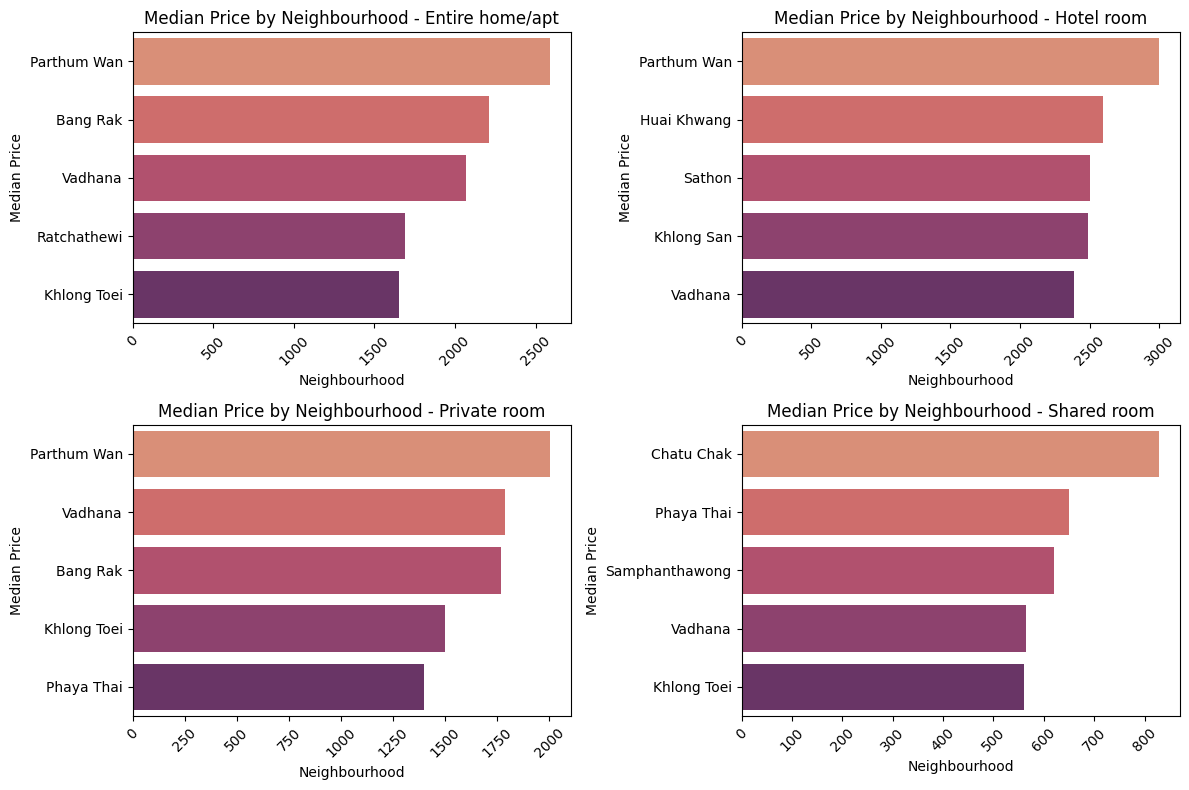

In [57]:
room_types = ['Entire home/apt', 'Hotel room', 'Private room', 'Shared room']

plt.figure(figsize=(12, 8))
for i, room_type in enumerate(room_types, 1):
    plt.subplot(2, 2, i)
    subset_data = filter_df_price[filter_df_price['room_type'] == room_type]
    avg_price_by_neighbourhood = subset_data.groupby('neighbourhood')['price'].median().sort_values(ascending=False).head(5)
    sns.barplot(y=avg_price_by_neighbourhood.index, x=avg_price_by_neighbourhood.values, palette='flare')
    plt.xticks(rotation=45)
    plt.xlabel('Neighbourhood')
    plt.ylabel('Median Price')
    plt.title(f'Median Price by Neighbourhood - {room_type}')
    plt.tight_layout()

plt.show()

Objective: Melihat median per neighbourhood yang tertinggi berdasarkan tipenya. Informasi bertujuan untuk mencari per masing-masing tipe, dimanakah lokasi yang mediannya mahal.

Insight: Beberapa Hal yang bisa kita ambil,
- Untuk tipe entire home/apt, Hotel room dan Private room, median tertinggi adalah distrik Parthum Wan. Diketahui sebelumnya di penjelasan bagian 2.3 bahwa Parthum Wan adalah tempat paling 'luxurius' di Bangkok. Berbagai tanah mahal pun ada di area ini. Sewajarnya jika median di area ini tertinggi.
- Untuk tipe Shared Room, yang tertinggi adalah Chatu Chak. Di bagian 2.3 telah disebutkan bahwa Chatu Chak memiliki Chatuchak Market atau largest Weekend Market in the world. Karena hal tersebut dan kata 'weekend' bisa diartikan banyak turis yang menghabiskan waktunya berkunjung di akhir pekan. Dan bisa diasumsikan pengunjung tersebut lebih memilih untuk mencari akomodasi dengan sifat 'budget-friendly'.
- Untuk Vadhana muncul sebagai top 5 median tertinggi di masing-masing 4 tipe tersebut, sewajarnya Vadhana adalah distrik sentral dan juga termaju di Bangkok.

Implikasi:
- Sebenarnya, Airbnb tidak memiliki pengaruh untuk menentukan harga secara langsung, karena host lah yang melakukan itu. Airbnb sendiri hanya mendapatkan sekitar 3% fee dari host dan 12-16% fee dari guest yang juga dihitung dari price yang ditentukan host.
- Pertanyaannya adalah, apakah airbnb mendapatkan optimasi keuntungan dari rate tersebut, dengan kata lain apakah host memberikan harga yang sesuai atau malah underpriced yang mempengaruhi rate tersebut. Atau mungkin harga yang ditentukan host itu overpriced sehingga tidak ada customer yang mau memesan. Kita coba buat sebuah skenario dibawah ini

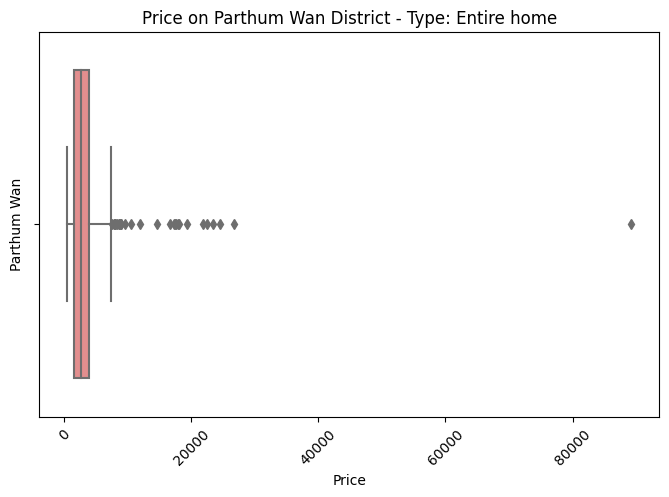

In [58]:
Entire_ParthumWan_Apt = df[(df['neighbourhood'] == 'Parthum Wan') & (df['room_type'] == 'Entire home/apt')]

plt.figure(figsize=(8, 5))
sns.boxplot(data=Entire_ParthumWan_Apt, x='price',color='lightcoral')
plt.xticks(rotation=45)
plt.title('Price on Parthum Wan District - Type: Entire home')

plt.xlabel('Price')
plt.ylabel('Parthum Wan')
plt.show()

Terlihat bahwa tipe entire home/apt di Parthum Wan itu memiliki outliers dan banyak harga yang diatas rata-rata. Kita bisa mengatakan harganya banyak yang terlalu tinggi. Tapi bisa jadi juga memang amenities atau fasilitas yang diberikan sangat mewah dan kita tidak bisa menyalahkan host_id. Namun ada sebuah dampak, kita asumsikan saja user lebih memilih harga yang mendekati median untuk tinggal disitu. Bagaimana cara menanggapinya,
- Jika overpriced, maka airbnb bisa memberikan diskon untuk para guess yang ingin memesan harga disana, bisa dengan early-bird discount(memesan lebih awal) atau seasonal discount. Dengan kata lain, host akan tetap mendapatkan bayaran yang sama dan customer bisa menikmatinya dengan lebih murah. Memang airbnb perlu mengeluarkan biaya lebih, namun dengan kata lain 'barang' tersebut akan tetap laku daripada menunggu lama tersewa.
- Namun bagaimana jika skenarionya underpriced, airbnb bisa selalu menyarankan host memakai 'airbnb plus'. Itu adalah fitur khusus host untuk menentukan range minimum dan maksimum dengan alghoritma yang tertumpu pada median harga,amenities,dan demand sekitarnya di area yang sama. Dengan ini host yang menentukan harga underpriced pun bisa sadar dengan harga kisaran didaerah itu.
- Saran saya lainnya untuk airbnb plus adalah, airbnb perlu mengupdatenya setiap saat, karena saya melihat banyak host yang mengeluh menggunakan itu karena harga kisarannya tidak terlalu update.  

## 3.3 Optimizing Place (Location)

Sekarang kita akan analisa lokasinya yang tertuju pada neighbourhood/distriknya

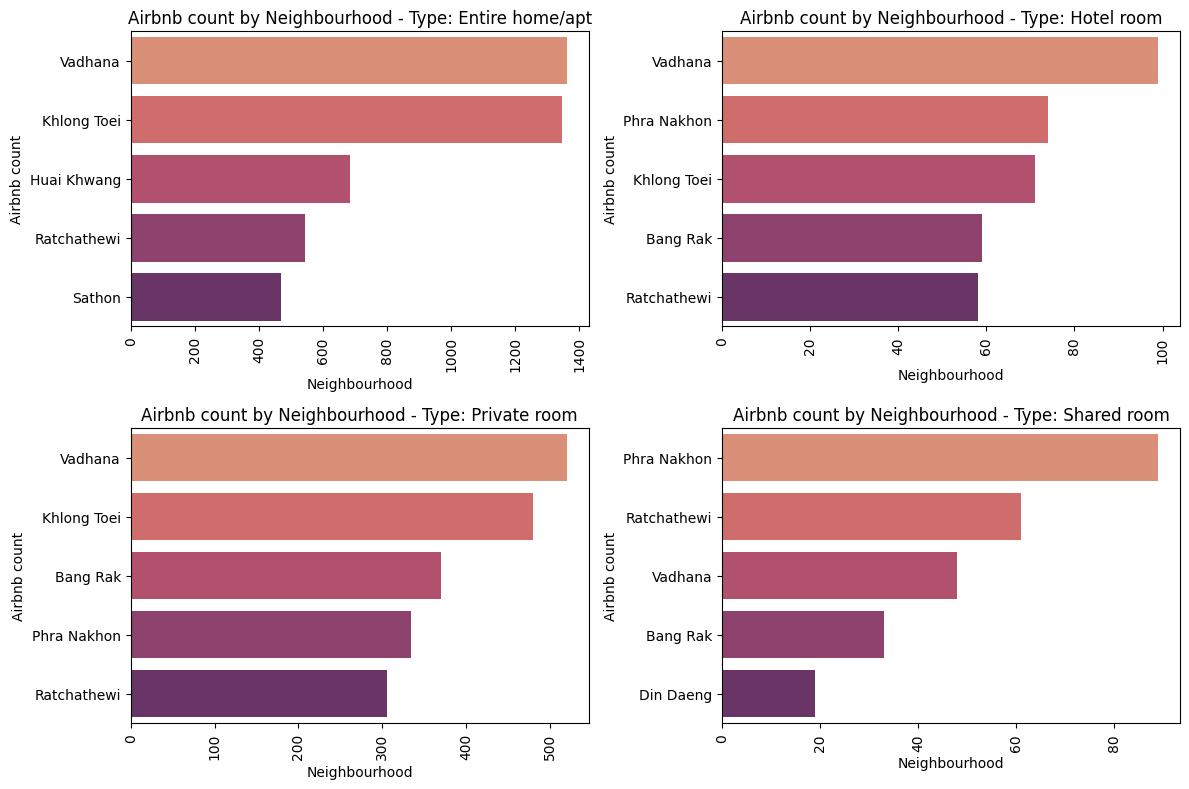

In [59]:
room_types = ['Entire home/apt', 'Hotel room', 'Private room', 'Shared room']

plt.figure(figsize=(12, 8))
for i, room_type in enumerate(room_types, 1):
    plt.subplot(2, 2, i)
    subset_data = df[df['room_type'] == room_type]
    count_by_neighbourhood = subset_data.groupby('neighbourhood')['place_description'].count().sort_values(ascending=False).head(5)
    sns.barplot(y=count_by_neighbourhood.index, x=count_by_neighbourhood.values, palette='flare')
    plt.xticks(rotation=90)
    plt.xlabel('Neighbourhood')
    plt.ylabel('Airbnb count')
    plt.title(f'Airbnb count by Neighbourhood - Type: {room_type}')
    plt.tight_layout()

plt.show()

Objective: Melihat persebaran airbnb dibedakan dengan tipe dan juga distriknya masing-masing

Insight: Beberapa Hal yang bisa kita ambil,
- Untuk tipe entire apt/home (satu bangunan), daerah yang paling banyak airbnbnya adalah Vadhana, Khlong Tei, dan Huai Khwang. Hal ini selaras dimana ketiga area ini adalah lokasi pusat Bangkok dengan perkembangan yang maju. Serta ketiga area ini adalah area yang bersebelahan.
- Untuk tipe hotel, Vadhana masih yang paling banyak karena lokasi sentris dan ekonomi yang maju, sewajarnya banyak hotel yang bekerja sama dengan airbnb disini. Distrik kedua terbanyak dari tipe ini adalah Phra Nakon. Hal ini didasari karena area Phra Nakon adalah tujuan utama parawisata Bangkok dengan banyak lokasi-lokasi menarik untuk dikunjungi.
- Untuk kategori private room, Vadhana masih paling banyak dan disusul Khlong Tei, namun Bang Rak menempati posisi ketiga. Bang Rak sendiripun berada di posisi 4 untuk tipe hotel dan shared room, hal ini didasari karena Bang Rak adalah lokasi dunia malam dan panorama pemandangan, maka wajar jika banyak airbnb mengakomodasi sebuah kamar untuk para wisatawan.
- Untuk kategori shared room, Phra Nakon lah yang terbanyak karena memang lokasi ini adalah area magnet turis. Disusul dengan Ratchatewi yang mana merupakan pusat transportasi atau tempat 'menyinggah' para wisatawan. Kedua tempat ini memang cocok untuk para petualang yang memiliki 'budget friendly'

Implikasi:
Rekomendasi,
- Kita melihat beberapa area memang cocok untuk suatu tipe seperti entire home/apt di daerah ekonomi maju, contohnya Vadhyana. 
- Kita bisa juga menyimpulkan jika ada banyak airbnb dengan suatu tipe di daerah itu, berarti ada sinyal positif bahwa memang airbnb dibutuhkan disana. 
- Namun harus diperhatikan dengan yang namanya 'overcrowding' market, yang artinya terlalu banyak kompetitor atau pemain bisnis yang sama di daerah itu.
- Perlu dicari 'unique selling point' atau hal berbeda dalam pemilihan tempat investasinya, bisa dilihat dengan harga, posisi tempat ataupun fasilitas. 
- Namun saya memiliki rekomendasi untuk daerah Ratchathewi berdasarkan penjelasan grafik diatas, kita mengetahui bahwa area itu adalah transport hub dan areanya kecil. Maka kita akan membandingkan tipe entire home/apt disana dengan jumlah shared roomnya.

In [60]:
print('Neighbourhood: Rachatchewi')
df[df['neighbourhood'] == 'Ratchathewi'].groupby('room_type')['room_type'].value_counts()

Neighbourhood: Rachatchewi


room_type
Entire home/apt    544
Hotel room          58
Private room       306
Shared room         61
Name: count, dtype: int64

Bisa kita lihat bahwa ada shared room disana hanya 61 tempat dibandingkan dengan jumlah entire home/apt yang 544. Ada gap yang cukup besar disini, apalagi kita tahu Ratchathewi dikenal sebagai tempat 'menyinggah' para turis yang tujuannya untuk istirahat saja. Rekomendasi yang saya berikan untuk para host entire home/apt disini adalah, membagi ruang-ruangan entire home/apt menjadi shared room tersendiri. Dengan begitu, diharapkan lebih banyak turis yang memesan shared room bagi pemilik host tersebut.

Rekomendasi lain yang bisa aya berikan di location optimization adalah mencari tempat-tempat terkenal untuk turis dan membandingkannya dengan jumlah airbnb yang ada disana. Apakah area-area tempat terkenal itu sudah dioptimalkan oleh airbnb atau belum, mari kita bahas dibawah ini.

Saya memakai dataset external untuk mencari tempat-tempat terkenal di Bangkok. Cara saya mengolah datanya adalah mencari 10 website travel ternama dan juga halaman 'best places to visit in Bangkok to visit', setelah itu saya mengelompokkannya dengan mencari nama tempat paling banyak yang disebut diantara 10 website tersebut. 

In [61]:
df_favorite_places = pd.read_excel('data_external_capstone_bangkok.xlsx')
df_favorite_places.head()

tripadvisor        planetware          holidify            touropia  \
0  Wat Phra Chetuphon  The Grand Palace  The Grand Palace       Yaowarat Road   
1        BTS Skytrain           Wat Pho          Wat Arun              Erawan   
2            Wat Arun          Wat Arun    Damnoen Saduak  Bangkok Art Centre   
3    Chatuchak Market       Wat Traimit           Wat Pho          MBK Centre   
4    The Grand Palace        Wat Suthat  Chatuchak Market           Wat Saket   

              trazy   thecrazytourist        voyagetips            tusktravel  \
0  The Grand Palace           Wat Pho  The Grand Palace  Safari World Bangkok   
1     Wat Phra Kaew  The Grand Palace           Wat Pho           Giant Swing   
2          Wat Arun      BTS Skytrain          Wat Arun          Siam Paragon   
3           Wat Pho  Chatuchak Market  Chatuchak Market        Damnoen Saduak   
4         Chinatown       Chao Phraya         Wat Saket         Wat Phra Kaew   

         myholidays           adotrip  
0          Wat Arun  The Grand Palace  
1       Chao Phraya          Wat Arun  
2      Siam Paragon           Wat Pho  
3  The Grand Palace       Giant Swing  
4      Jim Thompson  Chatuchak Market

In [62]:
#mengitung tempat wisata yang disebutkan paling banyak (minimal 4 kali sebut)
stacked = df_favorite_places.stack()
counts = stacked.value_counts()
counts_df = counts.reset_index()
counts_df = counts_df[counts_df['count'] >4]

In [63]:
counts_df.head(3)

index  count
0          Wat Arun      9
1           Lumpini      9
2  The Grand Palace      9

In [64]:
#Tempat wisata yang disebutkan paling banyak diatas, saya cari longitude dan latitudenya
data_external2 = pd.read_excel('data_external_capstone_bangkok.xlsx',sheet_name=1)
data_external2.drop(columns=['Unnamed: 4','Unnamed: 5'],inplace=True)
data_external2.head(20)

Favorite_Place   Neighbourhood        Lat        Long
0   The Grand Palace     Phra Nakhon  13.750300  100.491180
1           Wat Arun     Bangkok Yai  13.743702  100.486028
2            Lumpini     Parthum Wan  13.730556  100.541664
3            Wat Pho     Phra Nakhon  13.746575  100.492730
4          Chinatown  Samphanthawong  13.741907  100.512480
5   Chatuchak Market      Chatu Chak  13.799988  100.550840
6       Jim Thompson     Parthum Wan  13.749120  100.528450
7      Wat Phra Kaew     Phra Nakhon  13.758100  100.507200
8       Siam Paragon     Parthum Wan  13.742400  100.530600
9      Khao San Road     Phra Nakhon  13.720800  100.499200
10         Dusit Zoo           Dusit  13.749500  100.518900
11   National Museum     Phra Nakhon  13.752200  100.512800
12       Wat Traimit  Samphanthawong  13.744400  100.515900

In [65]:
# buat marker tempat wisata
bangkok_map = folium.Map(location=[13.736717, 100.523186], zoom_start=10, tiles='Stamen Toner')

#untuk membuat range.
bins_range = df_map['place_description'].quantile([0, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.65, 0.8, 0.95, 0.99, 1])
bins_range 
# file geojson bangkok, neighbourhood:
bangkok_geojson = 'bangkok_neighbourhoods.geojson'

# Choropleth
chor_neighbourhood = folium.Choropleth(
    geo_data= bangkok_geojson,          # file geojson (data geospatial)
    data= df_map,                           # dataframe pandas
    columns= ['neighbourhood', 'place_description'],   # kolom dataframe yg dipakai
    key_on= 'properties.neighbourhood',   # indexing nama distrik dlm file geojson untuk join dengan dataframe pandas
    fill_color = "YlOrRd",
    fill_opacity = 0.8,
    line_opacity = 0.7,
    legend_name = 'HeatMap Area of count airbnb location',
    bins= bins_range
)
chor_neighbourhood.add_to(bangkok_map)
bangkok_map


for index, row in data_external2.iterrows():
    marker = folium.Marker(
        location=[row['Lat'], row['Long']],
        tooltip=row['Favorite_Place'],
        popup=row['Favorite_Place'],
        icon=folium.Icon(color='blue', icon='flag')
    )
    marker.add_to(bangkok_map)

bangkok_map

Kita bisa melihat dari chloropleth diatas, tempat wisata yang paling banyak memang berada di densitas airbnb yang banyak, namun apakah sudah optimal?

Kita akan coba bandingkan, kedua data tersebut

In [66]:
#melihat data external kita, neighbourhoodnya ada apa aja.
ext = data_external2['Neighbourhood'].unique()
data_comparison_fav1 = pd.DataFrame(ext,columns=['neighbourhood'])
data_comparison_fav1

neighbourhood
0     Phra Nakhon
1     Bangkok Yai
2     Parthum Wan
3  Samphanthawong
4      Chatu Chak
5           Dusit

In [67]:
#membuat list top 10 distrik dengan airbnb terbanyak
data_comparison_fav2 = df['neighbourhood'].value_counts().head(10).reset_index()
data_comparison_fav2

neighbourhood  count
0       Vadhana   2028
1   Khlong Toei   1912
2   Huai Khwang   1008
3   Ratchathewi    969
4      Bang Rak    797
5        Sathon    705
6   Phra Nakhon    549
7    Chatu Chak    541
8  Phra Khanong    536
9   Parthum Wan    446

Selanjutnya kita akan compare, apakah top 10 distrik/neighbourhood terbanyak airbnb di data awal kita tersebut di data_external, 1 jika iya 0 jika tidak

In [68]:
data_compare = data_comparison_fav1.copy()
data_compare['district_in_dataset1'] = 1
data_compare['district_in_dataset2'] = data_compare['neighbourhood'].isin(data_comparison_fav2['neighbourhood']).astype(int)
data_compare

neighbourhood  district_in_dataset1  district_in_dataset2
0     Phra Nakhon                     1                     1
1     Bangkok Yai                     1                     0
2     Parthum Wan                     1                     1
3  Samphanthawong                     1                     0
4      Chatu Chak                     1                     1
5           Dusit                     1                     0

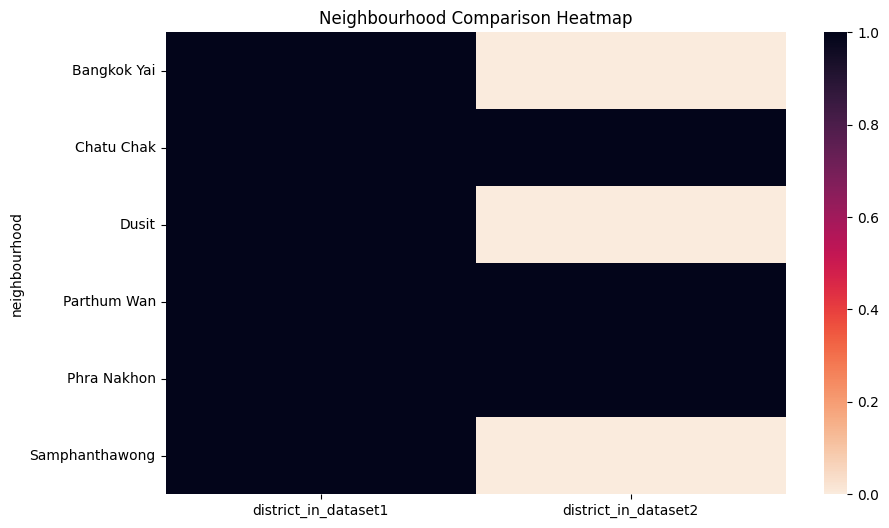

In [69]:
#Memvisualisasi dengan heatmap
heatmap_fav = data_compare.pivot_table(index='neighbourhood', values=['district_in_dataset1', 'district_in_dataset2'], aggfunc='max')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_fav, annot=False, cmap="rocket_r", fmt='d')
plt.title("Neighbourhood Comparison Heatmap")
plt.show()

### Rekomendasi lain dari place optimization berdasarkan penjelasan diatas:
- Dari heatmap diatas, saya akan merekomendasikan untuk memperbanyak kerjasama airbnb didaerah itu, seperti mencari host baru di daerah Bangkok Yai, Samphanthawong, Dusit.
- Hal ini diharapkan untuk menggali peluang kerjasama lebih dekat dengan wisata-wisata terkenal.

# 3.4 Analisis Lainnya

Ada hal lain yang bisa dianalisis dari sumber dataset.

In [70]:
zero_reviews = df[df['number_of_reviews'] == 0].shape[0]
has_reviews = df[df['number_of_reviews'] != 0].shape[0]

review_data = {
    "name": ["zero_reviews", "has_reviews"],
    "count": [zero_reviews, has_reviews]
}
df_review = pd.DataFrame(review_data)
df_review

name  count
0  zero_reviews   5449
1   has_reviews   9449

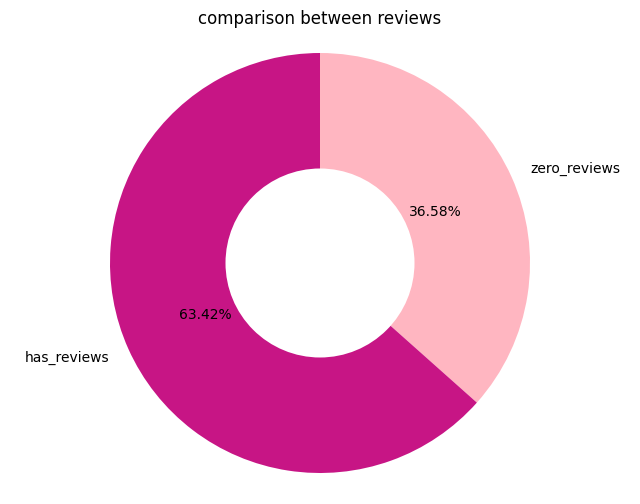

In [71]:
plt.figure(figsize=(8,6))
plt.pie(df_review['count'],labels=df_review['name'],autopct= '%.2f%%',colors=['lightpink','mediumvioletred'], startangle=90,counterclock=False,textprops={'color':'black'})
plt.axis('equal')
fig=plt.gcf()
centre_circle = plt.Circle((0,0),0.45,fc='white')
fig.gca().add_artist(centre_circle)
plt.title('comparison between reviews')
plt.show()

Objective: Melihat perbandingan yang ada review dan 0 review

Insight: 
- Review di airbnb itu sebenarnya penting karena ada beberapa hal. 
- Pertama, review yang baik bisa menjadi ajang promosi karena sudah ada bukti kepuasan user.
- Kedua, review akan memberikan impresi dan feedback user terhadap host itu sendiri. 
- Ketiga, jika host mendapatkan review dan rata-ratanya 4.8 atau lebih, itu akan membuat host sebagai super host. 
- Hampir 37 persen atau sepertiga lebih dari dataset, tidak memiliki review.

Implikasi/Rekomendasi
- Untuk membantu airbnb mengevaluasi hostnya, diharapkan review itu fitur yang harus diisi oleh guest.

# 4. KESIMPULAN DAN REKOMENDASI

Kesimpulan saya ialah bahwa Airbnb telah berhasil mengokohkan kehadirannya di pasar Bangkok yang kuat. Meskipun demikian, untuk memastikan kelangsungan posisinya, diperlukan usaha dalam mengoptimalkan produk, harga, dan lokasi.

Berikut adalah beberapa rangkuman rekomendasi yang dapat diterapkan:

Optimisasi Produk:
Tetap fokus pada menawarkan tipe akomodasi "entire home/apt" sebagai andalan dalam kategori tipe di Airbnb.
Tingkatkan kualitas fasilitas pada tipe shared_room dengan memperbaiki fasilitas yang disediakan.

Optimisasi Harga
Untuk akomodasi yang harganya terlalu tinggi, pertimbangkan memberikan diskon agar lebih menarik bagi wisatawan.
Bagi akomodasi yang harganya terlalu rendah, disarankan untuk terus memperbarui opsi "Airbnb Plus" untuk standar harga yang sesuai dengan rata-rata di masing-masing distrik tersebut.

Optimisasi Lokasi
Lakukan studi lebih lanjut untuk menentukan lokasi yang paling cocok untuk menawarkan tipe Entire home/apt atau tipe lainnya. Sebagai contoh, Ratchatewi merupakan pusat transportasi, namun memiliki sedikit pilihan tipe "shared_room". Peluang untuk meningkatkan jumlah tipe tersebut sebaiknya dieksplorasi. Serta perluas kerjasama dengan lokasi-lokasi wisata populer agar lebih banyak opsi akomodasi yang tersedia.

Rekomendasi Tambahan:
Dorong para tamu untuk memberikan review setelah menginap guna membantu Airbnb dalam mengevaluasi kualitas para tuan rumah.
Perketat persyaratan bagi tuan rumah untuk memastikan iklan yang mereka unggah di platform sesuai dengan standar yang ditetapkan.

Dengan menerapkan saran-saran di atas, diharapkan Airbnb di Bangkok dapat terus berinovasi dan mempertahankan daya saingnya dalam industri akomodasi.

![pandas](bangkok_ic.png)